# TMA4320 Project 3 V25

### Authors: group no. 2025

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.fft import fft, fft2, ifft, ifft2, fftfreq, fftshift
import pandas as pd
from scipy.integrate import dblquad
import matplotlib.animation as animation
import itertools

## Task 1

### (i)

C:\Users\edvar\AppData\Local\Temp\ipykernel_7328\717527453.py:14: RuntimeWarning: divide by zero encountered in log
  (1 - u) * np.log((1 - u) / 2) + (1 + u) * np.log((1 + u) /2))
C:\Users\edvar\AppData\Local\Temp\ipykernel_7328\717527453.py:14: RuntimeWarning: invalid value encountered in multiply
  (1 - u) * np.log((1 - u) / 2) + (1 + u) * np.log((1 + u) /2))


Minimum at u = -1.0
Maximum at u = -0.0020000000000000018


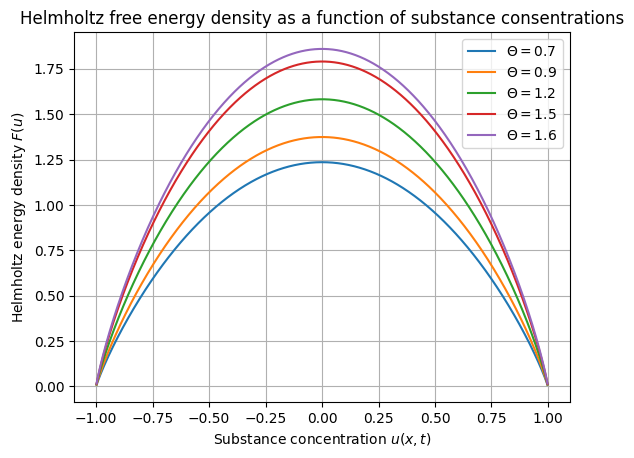

In [ ]:
theta_c = 1.5
def F(u,theta,theta_c=theta_c):
    '''
    INPUT
    u:          Ndarray or float. Substance density.
    theta:      Float. Temperature.
    theta_c:    Float. Critical temperature. Set to 1.5.
    
    OUTPUT
    Float. Helmholtz free energy density as per eq. (83) in project description. 

    '''
    return (theta_c / 2) * (1 - u**2) - (theta / 2) * (
        (1 - u) * np.log((1 - u) / 2) + (1 + u) * np.log((1 + u) /2))


# Endpoints are not defined due to undefined value of log(0).
u = np.linspace(-1, 1, 1000, endpoint=False)
theta_vals = [0.7, 0.9, 1.2, 1.5, 1.6]

min_index=0
max_index=0

for theta in theta_vals:
    energy_density = F(u, theta, theta_c = theta_c)
    plt.plot(u, energy_density, label="$\Theta=$"+str(theta))

    # First index is still 'NaN'. This cleans it up and allows 
    # us to find minimum and maximum.
    clean_energy_density = np.array([x for x in energy_density if x==x]) 
                                                                         
    min_index=np.argmin(clean_energy_density)
    max_index=np.argmax(clean_energy_density)

print("Minimum at u = " +str(u[min_index]))
print("Maximum at u = " +str(u[max_index]))

# Plotting details
plt.title("Helmholtz free energy density as a function of substance consentrations")
plt.xlabel("Substance concentration $u(x,t)$")
plt.ylabel("Helmholtz energy density $F(u)$")
plt.legend()
plt.grid()
plt.show()

The plot shows that increasing the temperature, $\theta$, leads to an increase in the area under the curve $F$. From Ginzburg-Landau, we expect that increasing the integral of $F$ leads to an increase in the mixing energy $\mathcal{E}_{\text{mix}}$. 

The plot also suggests that the $u$-coordinates that yield minimas and maximas, are independent of temperature. Specifically,  $u_{\text{min}}=\pm 1$ and $u_{\text{max}}=-0.002$, regardless of our choice of $\theta$.

## (ii)

To show that the Cahn-Hilliard equation is invariant under the transformation $u\mapsto-u$, we substitute $u$ for $-u$ and show that the result is also a solution of the Cahn-Hilliard equation given by eq. (80) in the project description. First, we rewrite (80) in terms of $u$:

$$
\partial_t u = \nabla \cdot 
\left( 
    M \nabla 
    \left( 
        -\kappa \Delta u + f(u)
    \right)
\right).
\tag{1}
$$

Then, we substitute $u$ with $-u$. First, 

$$
f(-u) = \theta_c u + \frac{\theta}{2} \ln
\left(
    \frac{1 - u}{1 + u}
\right)=
\theta_c u- \frac{\theta}{2} \ln
\left(
    \frac{1 + u}{1 - u}
\right)
= -f(u) \text{.}
\tag{2}
$$

Then, we have

$$
\text{LSH} = - \partial_t u,
\tag{3}
$$

$$\begin{aligned}
\text{RHS} =& \ 
\nabla \cdot 
\left( 
    M \nabla 
    \left( 
        \kappa \Delta u + f(-u)
    \right)
\right)\\
=& \ 
- \nabla \cdot 
\left( 
    M \nabla 
    \left( 
        - \kappa \Delta u + f(u)
    \right)
\right).
\tag{4}
\end{aligned}$$

Putting this together, we get

$$
- \partial_t u  
=\ 
- \nabla \cdot 
\left( 
    M \nabla 
    \left( 
        - \kappa \Delta u + f(u)
    \right)
\right).
\tag{5}
$$

We can simply remove the $-$ signs from both sides, which leads to (80). 


Physcially, this implies that if $u$ is a solution of the  Cahn-Hilliard equation, then so is $-u$. 

<br>

## (iii)

The time derivative of the total mass of a Cahn-Hilliard solution $u(\boldsymbol{x},t)$, which is periodic on a rectangular domain $\Omega = [0, L_x) \times [0, L_y)$ can be written as

$$\begin{equation}
\frac{d}{dt} \int_\Omega u(\boldsymbol{x},t) \,d\boldsymbol{x} = \int_\Omega \partial_{t} u(\boldsymbol{x},t) \,d\boldsymbol{x}
=\int_\Omega \nabla (M \nabla \mu) \,d\boldsymbol{x}.
\tag{6}
\end{equation}$$

The divergence theorem tells us that for a vector field $\boldsymbol{F}$ and a two-dimensional surface $D$, we have

$$\begin{equation}
\int_D \nabla \boldsymbol{F} \,dA = \int_{\partial D} \boldsymbol{F} \,d\boldsymbol{S},
\tag{7}
\end{equation}$$
where $\partial D$ denotes the boundary of $D$ and $d\boldsymbol{S}$ is always perpendicular to $\partial D$. Applying the divergence theorem to eq. $(6)$ we get

$$\begin{equation}
\int_\Omega \nabla (M \nabla \mu) \,d\boldsymbol{x} = \int_{\partial \Omega} M \nabla \mu \,d\boldsymbol{S} = \int_{\partial \Omega} M \left( \frac{\partial \mu}{\partial x}, \frac{\partial \mu}{\partial y} \right) \,d\boldsymbol{S}.
\tag{8}
\end{equation}$$

It is possible to find $d\boldsymbol{S}$ by taking advantage of the fact that $\Omega$ is rectangular. Four sides require four $d\boldsymbol{S}$. Assuming that $x \in [0,L_x]$ and $y \in [0,L_y]$, the four boundaries are loacted at $x=0$, $x=L_x$, $y=0$, $y=L_y$ and the corresponding $d\boldsymbol{S}$ are as follows:

$$\begin{aligned}
x=0 : d\boldsymbol{S} =(-1,0)dy \nonumber \\
x=L_x : d\boldsymbol{S} =(1,0)dy \nonumber \\
y=0 : d\boldsymbol{S} =(0,-1)dx \nonumber \\
y=L_y : d\boldsymbol{S} =(0,1)dx. \\ 
\tag{9}
\end{aligned}$$

Inserting this into eq. $(8)$ we get

$$\begin{aligned}
\int_{\partial \Omega} M \nabla \mu \,d\boldsymbol{S} = M \left[ -\int_{0}^{L_y} \left .\frac{\partial \mu}{\partial x} \right|_{x=0} \,dy +\int_{0}^{L_y} \left .\frac{\partial \mu}{\partial x} \right|_{x=L_x} \,dy -\int_{0}^{L_x} \left .\frac{\partial \mu}{\partial y} \right|_{y=0} \,dx +\int_{0}^{L_x} \left .\frac{\partial \mu}{\partial y} \right|_{y=L_y} \,dx\right].
\tag{10}
\end{aligned}$$

Since $\mu$ is periodic, i.e. repeats itself for every $L_x$, $L_y$, the derivatives of $\mu$ should be the same in $x=L_x$ and $y=L_y$ as in $x=0$ and $y=0$, respectively. Therefore, the integrals in eq. $(10)$ cancel out and we conclude that

$$\begin{equation}
\frac{d}{dt} \int_\Omega u(\boldsymbol{x},t) \,d\boldsymbol{x} =0.
\tag{11}
\end{equation}$$

## Task 2

In this task we solve the biharmonic equation with a $0$-th order term $f$:

$$\begin{aligned}

\Delta^2 u(x,y)+cu(x,y)=f(x,y) \qquad \text{in } \Omega=[0,L_x) \times [0, L_y),
\tag{12}
\end{aligned}$$

where $c\geq 0$. One can compute the solution $u$ by using fast Fourier transform on the entire equation so that

$$\begin{aligned}

\mathcal{F}[u(x,y)](k_x,k_y)=\hat{u}(k_x,k_y) \\ 
\mathcal{F}[f(x,y)](k_x,k_y)=\hat{f}(k_x,k_y).
\tag{13}
\end{aligned}$$

Since we know that $u$ is periodic, we can calculate $\mathcal{F}[\Delta^2 u]$ as follows:

$$\begin{align}

\mathcal{F}[\Delta^2 u]= \mathcal{F}[{\partial_x}^4 u]+\mathcal{F}[{\partial_y}^4 u]+2\mathcal{F}[{\partial_x}^2{\partial_y}^2 u] \nonumber \\
= \left( \frac{-i2\pi k_x}{L_x} \right)^4 \hat{u}+\left( \frac{-i2\pi k_y}{L_y} \right)^4 \hat{u}+ 2\left( \frac{-i2\pi k_x}{L_x} \right)^2 \left( \frac{-i2\pi k_y}{L_y} \right)^2 \hat{u} \nonumber \\
=\left[\left( \frac{2\pi k_x}{L_x} \right)^4+\left( \frac{2\pi k_y}{L_y} \right)^4 +2\left( \frac{2\pi k_x}{L_x} \right)^2 \left( \frac{2\pi k_x}{L_x} \right)^2 \right] \hat{u} \nonumber \\
=(\tilde{k}_x^4+\tilde{k}_y^4+2\tilde{k}_x^2 \tilde{k}_y^2) \hat{u} \nonumber \\
=\tilde{k}_4 \hat{u},
\tag{14}

\end{align}$$

where $\tilde{k}_x=\frac{2\pi k_x}{L_x}$, $\tilde{k}_y=\frac{2\pi k_y}{L_y}$, and $\tilde{k}_4=\tilde{k}_x^4+\tilde{k}_y^4+2\tilde{k}_x^2 \tilde{k}_y^2$. This notation will be used in the rest of the project. Hence, the Fourier transform of eq. $(12)$ can be written as


$$\begin{align}

\hat{u}=\frac{\hat{f}}{\tilde{k}_4+c},
\tag{15}

\end{align}$$

which can be inversely transformed to find $u$. However, we need to consider the case where $c=0$. To avoid division by zero, we set $\tilde{k}_4=1$ when $k_x=k_y=0$. Furthermore, since $\hat{u}(0,0)=\mu[u]$, i.e. the mean value of $u$, we set $\hat{u}(0,0)$ to a predetermined mean value multiplied by the number of spatial timesteps $N_x \cdot N_y$. The last part is due to division by $N_x \cdot N_y$ in the inverse FFT.

In [4]:
def biharmonic_solver(X, Y, F, c, mean=0.0):
    '''
    Solve the biharmonic equation in 2D using the spectral method.

    INPUT
        X (ndarray): 2D array of x-coordinates.
        Y (ndarray): 2D array of y-coordinates.
        F (ndarray): 2D array representing the right-hand side of the biharmonic equation.
        c (float): Constant coefficient in the biharmonic equation.
        mean (float, optional): Desired mean value of the solution in case c = 0. Default is 0.0.

    OUTPUT
        U (ndarray): 2D array representing the solution to the biharmonic equation.
    '''

    # Extract grid data
    x, y = X[0,:], Y[:,0]
    Nx, Ny = len(x), len(y)
    if Nx < 2 or Ny < 2:
        raise ValueError("Grids must have at least two points in each space direction!")
    dx, dy = x[1]-x[0], y[1]-y[0]     # Distance between samples

    # Compute wave number grid
    kx = fftfreq(Nx, d=dx)*2*np.pi
    ky = fftfreq(Ny, d=dy)*2*np.pi
    KX, KY = np.meshgrid(kx, ky, sparse=True)
    K4=KX**4+KY**4+2*(KX**2)*KY**2 # Biharmonic operator

    F_hat=fft2(F)   # Fourier transform of rhs

    tol = 0.0001    # Tolerance
    # Find lowest frequency in Fourier-space (in absolute value)
    kx_min=min(abs(kx))
    ky_min=min(abs(ky))
    k_min=abs(np.amin([kx_min,ky_min]))

    if c<=tol*k_min**4:         # Check if c=0
        K4[0,0]=1               # Avoid division by zero
        U_hat = F_hat / (K4)    # Find Fourier transform of U
        U_hat[0,0]=mean*Nx*Ny   # Define mean value
                                # Multiply with number of gridpoints because of division by Nx*Ny in the inverse FFT
        U = ifft2(U_hat).real   # Inverse Fourier transform of solution
        return U
    
    # If c is not 0, no danger of division by zero (K4>0)
    U_hat = F_hat / (K4+c)
    U = ifft2(U_hat).real
    return U
    
# Exact solution
def manufacture_solution_biharmonic(u_str,c):
    '''
    Manufacture f for the biharmonic equation with a solution u_str.

    INPUT
    u_str: String. User defined solution.
    c:     Float. Non-negative constant.

    OUTPUT
    u:     Lambda-function. u_str converted to a function.
    f:     Lambda-function. Right hand side of biharmonic equation with solution u.

    '''
    import sympy as sy
    from sympy import sin, cos, exp

    x, y = sy.symbols('x y')
    u_sy = eval(u_str)
    biharm = lambda u: sy.diff(u, x, 4) + sy.diff(u, y, 4)+2*sy.diff(u, x, x, y, y)+c*u
            # biharm = lhs
    f_sy = sy.simplify(biharm(u_sy)) # rhs
    print(f'u = {u_sy}')
    print(f'f = {f_sy}')

    # Turn strings into functions
    u = sy.lambdify((x, y), u_str, modules='numpy')
    f = sy.lambdify((x, y), f_sy, modules='numpy')
    return u, f

u = sin(8*x - 8)*cos(4*y)
f = 6401*sin(8*x - 8)*cos(4*y)
u = exp(sin(x)**2 + cos(2*y))
f = (16*sin(x)**8 + 64*sin(x)**6 + 128*sin(x)**4*sin(y)**4 - 192*sin(x)**4*sin(y)**2 + 16*sin(x)**4 - 48*sin(x)**2 + 256*sin(y)**8 - 1280*sin(y)**6 + 1792*sin(y)**4 - 768*sin(y)**2 + 52)*exp(sin(x)**2 + cos(2*y))

 EOC for test 1 

   Nx         Error         EOC
0   4  2.532757e+04         inf
1   8  1.892177e+02    7.064518
2  15  4.913842e+00    5.807813
3  16  3.419487e-14  505.105422
4  20  3.572975e-13  -10.515622
5  32  1.716960e-12   -3.339850

 


 EOC for test 2 

   Nx         Error        EOC
0   4  4.283095e+01        inf
1   8  5.623272e+01  -0.392756
2  12  9.039969e+00   4.508016
3  16  4.207284e-01  10.662547
4  20  1.395357e-02  15.264846
5  24  5.752609e-04  17.489249
6  28  2.764803e-05  19.690274
7  32  1.317665e-06  22.793842
8  36  5.928017e-08  26.330969
9  40  2.516145e-09  29.987960


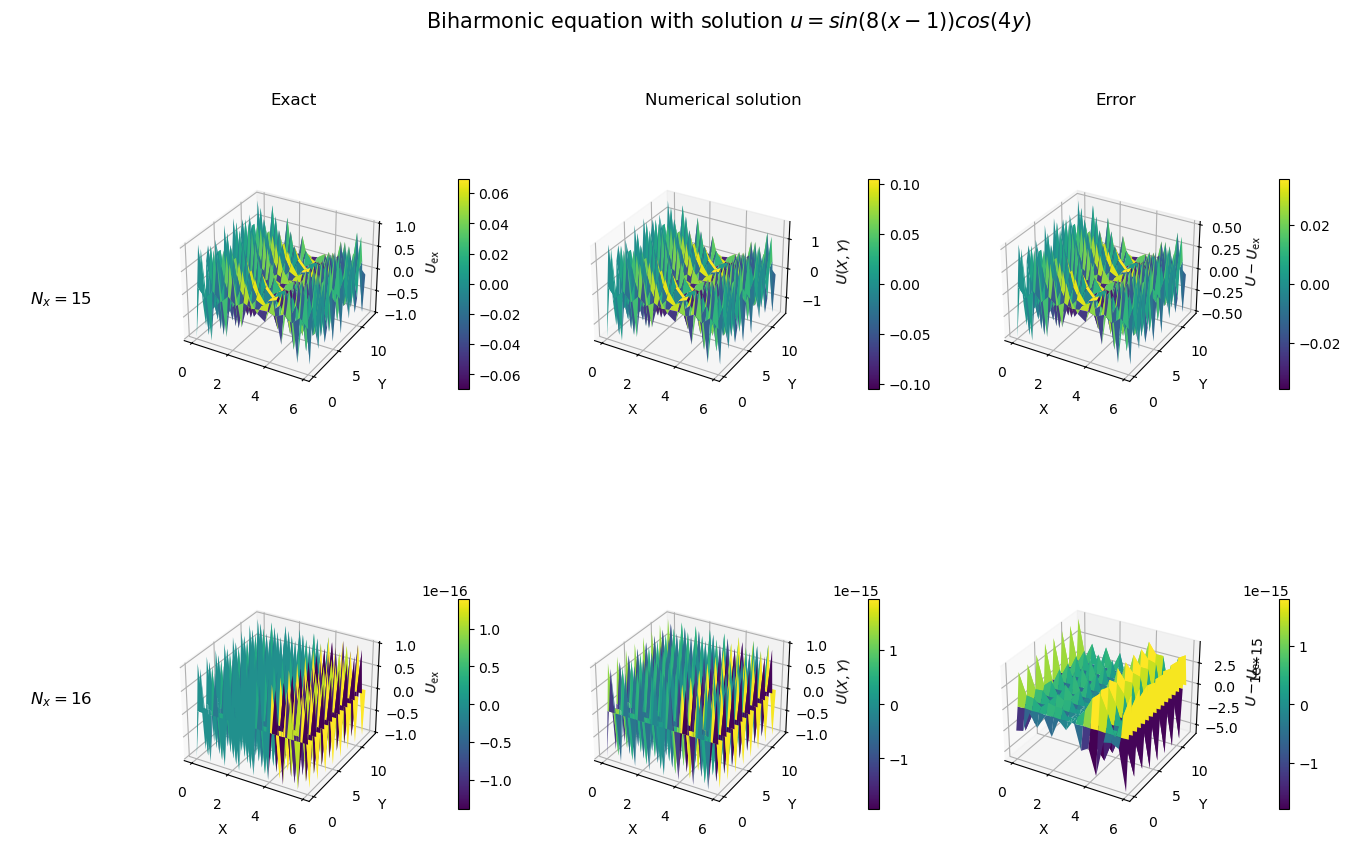

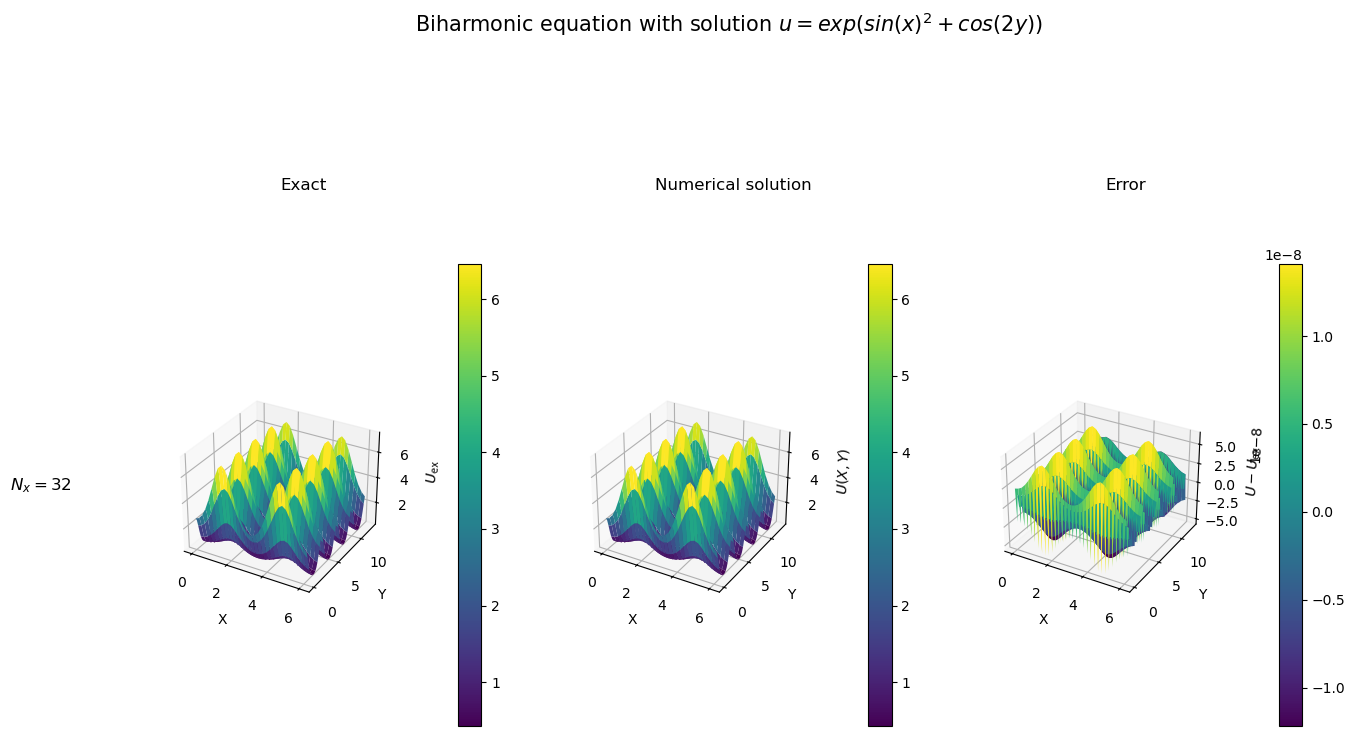

In [10]:
# Gridlengths
Lx = 2*np.pi
Ly = 4*np.pi

# Manufacture u and f for the two cases
u_str_1 = 'sin(8*(x-1))*cos(4*y)'
u_exact_1, f_1 = manufacture_solution_biharmonic(u_str_1, 1)

u_str_2 = 'exp(sin(x)**2+cos(2*y))'
u_exact_2,f_2 = manufacture_solution_biharmonic(u_str_2, 0)

# Nx values for the two cases. Ny=2*Nx is defined later
Nx_1 = np.array([4,8,15,16,20,32])
Nx_2 = np.array([4 + 4*k 
                 for k in range (10)])

# Solution 1:
errs_1=np.zeros(len(Nx_1))  # Errors
ind = 0 # Index
comp = 0 # Computation no.
fig_1 = plt.figure(figsize=(15, 10))

for Nx in Nx_1:
    # Make grid
    x_1 = np.linspace(0, Lx, Nx, endpoint=False)
    y_1 = np.linspace(0, Ly, Nx*2, endpoint=False)
    X_1, Y_1 = np.meshgrid(x_1, y_1, sparse=True)

    #Solve equation
    F_1=f_1(X_1,Y_1)
    U_exact_1=u_exact_1(X_1,Y_1)
    U_1=biharmonic_solver(X_1, Y_1, F_1, 1)

    # Find and record difference between exact and numerical solution
    U_err_1 = U_1 - U_exact_1
    errs_1[comp]=np.linalg.norm(U_err_1,np.inf)
    comp+=1

    # Plot for Nx=15 and Nx=16
    if Nx==15 or Nx==16:
        ind+=1
        ax = fig_1.add_subplot(230+ind, projection='3d')
        surf = ax.plot_surface(X_1, Y_1, U_exact_1, cmap='viridis', antialiased=True)
        fig_1.colorbar(surf, shrink=0.6,pad=0.2)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel(r'$U_\mathrm{ex}$')

        ind+=1
        ax = fig_1.add_subplot(230+ind, projection='3d')
        surf = ax.plot_surface(X_1, Y_1,  U_1, cmap='viridis')
        fig_1.colorbar(surf, shrink=0.6,pad=0.2)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel(r'$U(X, Y)$')

        ind+=1
        ax = fig_1.add_subplot(230+ind, projection='3d')
        surf = ax.plot_surface(X_1, Y_1,  U_err_1, cmap='viridis')
        fig_1.colorbar(surf, shrink=0.6,pad=0.2)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel(r'$U-U_{\mathrm{ex}}$')

# Solution 2 (same procedure as above):
comp=0
errs_2=np.zeros(len(Nx_2))
fig_2 = plt.figure(figsize=(15, 10))

for Nx in Nx_2:

    x_2 = np.linspace(0, Lx, Nx, endpoint=False)
    y_2 = np.linspace(0, Ly, Nx*2, endpoint=False)
    X_2, Y_2 = np.meshgrid(x_2, y_2, sparse=True)

    F_2=f_2(X_2,Y_2)
    U_exact_2=u_exact_2(X_2,Y_2)
    U_2=biharmonic_solver(X_2, Y_2, F_2,0,mean=np.mean(U_exact_2))

    U_err_2 = U_2 - U_exact_2
    errs_2[comp]=np.linalg.norm(U_err_2,np.inf)
    comp+=1

    # Plot for Nx=32
    if Nx==32:
        ax = fig_2.add_subplot(131, projection='3d')
        surf = ax.plot_surface(X_2, Y_2, U_exact_2, cmap='viridis', antialiased=True)
        fig_2.colorbar(surf, shrink=0.6,pad=0.2)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel(r'$U_\mathrm{ex}$')

        ax = fig_2.add_subplot(132, projection='3d')
        surf = ax.plot_surface(X_2, Y_2,  U_2, cmap='viridis')
        fig_2.colorbar(surf, shrink=0.6,pad=0.2)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel(r'$U(X, Y)$')

        ind+=1
        ax = fig_2.add_subplot(133, projection='3d')
        surf = ax.plot_surface(X_2, Y_2,  U_err_2, cmap='viridis')
        fig_2.colorbar(surf, shrink=0.6,pad=0.2)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel(r'$U-U_{\mathrm{ex}}$')

# Find EOC for both cases and put them in a table
eocs_1=np.log(errs_1[:-1]/errs_1[1:])/np.log(Nx_1[1:]/Nx_1[:-1])
eocs_1 = np.insert(eocs_1, 0, np.inf)
eocs_2=np.log(errs_2[:-1]/errs_2[1:])/np.log(Nx_2[1:]/Nx_2[:-1])
eocs_2 = np.insert(eocs_2, 0, np.inf)

print('\n EOC for test 1 \n')
table_1 = pd.DataFrame({'Nx': Nx_1, 'Error': errs_1, 'EOC': eocs_1})
print(table_1) 
print('\n \n')

print('\n EOC for test 2 \n')
table_2 = pd.DataFrame({'Nx': Nx_2, 'Error': errs_2, 'EOC': eocs_2})
print(table_2)

# Stylistic plot details
fig_1.suptitle('Biharmonic equation with solution $u=sin(8(x-1))cos(4y)$ \n',fontsize=15)
fig_1.text(0.02, 0.55, '$N_x=15$', fontsize=12, transform=plt.gcf().transFigure)
fig_1.text(0.02, 0.15, '$N_x=16$', fontsize=12, transform=plt.gcf().transFigure)
fig_1.text(0.18, 0.75, 'Exact', fontsize=12, transform=plt.gcf().transFigure)
fig_1.text(0.43, 0.75, 'Numerical solution', fontsize=12, transform=plt.gcf().transFigure)
fig_1.text(0.73, 0.75, 'Error', fontsize=12, transform=plt.gcf().transFigure)

fig_2.suptitle('Biharmonic equation with solution $u=exp(sin(x)^2+cos(2y))$ \n',fontsize=15)
fig_2.text(0.02, 0.5, '$N_x=32$', fontsize=12, transform=plt.gcf().transFigure)
fig_2.text(0.20, 0.8, 'Exact', fontsize=12, transform=plt.gcf().transFigure)
fig_2.text(0.45, 0.8, 'Numerical solution', fontsize=12, transform=plt.gcf().transFigure)
fig_2.text(0.75, 0.8, 'Error', fontsize=12, transform=plt.gcf().transFigure)

plt.subplots_adjust(wspace=0.2)
plt.tight_layout
plt.show()

For this task, the biharmonic equation given by

$$\begin{equation}
\Delta^2 u(x,y)+ cu(x,y) =f(x,y) , \qquad c\geq0
\tag{16}
\end{equation}$$

is solved for the following two solutions

$$\begin{aligned}
u_1(x,y)=\sin(8(x-1))\cos(4y), \qquad c=1 \\
u_2(x,y)=\exp[\sin^2(x)+\cos(2y)], \qquad c=0.
\tag{17}
\end{aligned}$$

in a rectangular domain $\Omega = [0, 2\pi) \times [0,4\pi)$. 

<br>

In both plots we see that the numerical solutions for both $u_1$ and $u_2$ closely resemble the exact solutions for each, and the error is therefore minimal.

When comparing the plots of $u_1$ for $N_x=15$ and $N_x=16$ we observe a drastic change in solution values. The scale of the error also drops from around $10^{-2}$ to the machine-precision scale of $10^{-15}$. This can be explained by aliasing. The largest frequency in $u_1$ is $8$, which means that according to the Nyquist-Shannon sampling theorem, the spatial sampling frequency ($N_x$) of $u_1$ should be at least $16$ to produce an accurate and aliasing-free solution. This is known as the Nyquist frequency and is given by $N_{x, Nyquist}=2f_{max}=2\cdot 8=16$ in this case. Since $15<N_{x, Nyquist}$, the sampling rate $N_x=15$ will therefore not be sufficient to 'catch' the higher frequency, leading to aliasing and increased error.

This effect can also be observed in the table containing the error and experimental order of convergence (EOC) for $u_1$. As soon as $N_x=N_{x, Nyquist}$, the error drops to machine-precision and EOC shoots up to above $500$. In other words, the numerical solution immediately becomes much more more accurate when $N_x\geq16$. Though the EOC table for $u_1$ shows that the EOC becomes negative for $N_x=20$ and $N_x=32$, one can assume that this is only due to the fact that the error scale is already on machine-precision level and can therefore not get much smaller.

From the error plot for $u_2$ we see a relatively small error scale of $10^{-8}$, and from the error-EOC table we see a large decrease in the error for increasing $N_x$. In fact, the EOC shows that only by changing $N_x$ from $36$ to $40$, the error becomes nearly $30$ times smaller. 

However, comparing the tables for $u_1$ and $u_2$ we can see that the error for $u_1$ decreases much faster than for $u_2$. This could be because the largest frequency in $u_1$ is finite, while this is not the case for $u_2$. $u_2$ is an exponential function containing trigonometric functions in the exponent. An exponential function can be written as

$$\begin{aligned}
\exp(x)=\lim_{n\to\infty} \left( 1+ \frac{x}{n} \right)^n,
\tag{18}
\end{aligned}$$

and through trigonometric identities one can show that 

$$\begin{aligned}
\sin^n(\theta)= ... +a \sin(n \theta) \\
\cos^n(\theta)= ... +b \cos(n \theta),
\tag{19}
\end{aligned}$$

with $n \in \mathbb{N}$, and $a,b \in \mathbb{R}$. Therefore, if $x$ in eq. $(18)$  is replaced by a trigonometric function, one ends up with an infinitely long sum of trigonometric equations so that the largest frequency is not finite. This is why the numerical solution for $u_2$ will be affected by aliasing for any $N_x$, and the error will never be as small as for $u_1$.

<br>

## Task 3 Theoreitcal

### (i)

The $\theta$-method, given by

$$\begin{align}
U^{n+1}=U^{n}+\tau 
\left[
    \theta F(t_{n+1}, \ U^{n+1}) + (1 - \theta) F(t_n, \ U^n)
\right]
\tag{20}
\end{align}$$

may be rewritten as a two-step Runge-Kutta method as follows,

$$\begin{aligned}
& k_1 = F(t_n,\ U^n) \\
& k_2 = F \left (
            t_n + \tau, \ U^n + \tau \theta k_2 + \tau (1 - \theta) k_1 
        \right) \\
& U^{n+1} = U^{n} + \tau 
\left[ 
    \theta k_2 + (1 - \theta)k_1 
\right].
\tag{21}
\end{aligned}$$

This gives the butcher tableau

$$\begin{array}
{c|cc}
0 & 0 & 0\\
1 & (1-\theta) & \theta \\
\hline
& (1-\theta) & \theta 
\tag{22}
\end{array}$$

To find the order of consistency, $p$, we check the order conditions for the Runge-Kutta method. For $p=1$,

$$\begin{align}
    \sum_{j=1}^{s} b_j = 1 \text{.}
    \tag{23}
\end{align}$$

Substituting in the values for the $\theta$-method, we obtain 

$$\begin{align*}
    b_1 + b_2 = 1-\theta+\theta=1.
\end{align*}$$

Since this holds for any $\theta$, the method is at least of order $1$. For $p = 2$, we have

$$\begin{align}

\sum_{j=1}^{s} b_j c_j = \frac{1}{2}.
\tag{24}

\end{align}$$

Applying this to the $\theta$ method we get

$$\begin{align*}

b_1 c_1 + b_2 c_2 = (1-\theta) \cdot 0 + \theta \cdot 1=\theta,

\end{align*}$$

meaning that the order condition for $p=2$ is fulfilled only if $\theta = \frac{1}{2}$. Therefore, when we check the condition for $p=3$ we have to assume that $\theta$ has this specific value. However, the first order condition for $p=3$,

$$\begin{align}

\sum_{j=1}^{s} b_j {c_j}^2 = \frac{1}{3},
\tag{25}

\end{align}$$

is not fulfilled in this case because

$$\begin{align*}

b_1 {c_1}^2 + b_2 {c_2}^2 = \theta = \frac{1}{2}.

\end{align*}$$

We thus conclude that the $\theta$ method has a consistency order of $p=1$ for $\theta \in \mathbb{R} ^{\setminus \{1/2\}} $, and $p=2$ for $\theta = 1/2$.

If $\theta$ is chosen to be $1/2$, the $\theta$ method becomes identical to the Crank-Nicolson method. Furthermore, if $\theta=0$ it is reduced to the explicit Euler method, and if $\theta=1$ it becomes the implicit Euler method.

<br>

## (ii)
 
Consider the following first order OED

$$\begin{equation}
\dot y = \lambda y
\tag{26}
\end{equation}$$

where $\lambda$ may be any real or imaginary value. We now proceed to use the $\theta$-method to solve eq. $(26)$.

$$
y_{n+1} = y_n + \tau 
\left[
    \theta f(t_{n+1}, y_{n+1}) + 
    (1 - \theta) f(t_n, y_n)
\right]
\tag{27}
$$

where $f = \dot y$. Substituting for eq. $(26)$ and rearranging gives 

$$
y_{n+1} = y_n \frac{1 + \tau \lambda (1-\theta)}{1 - \tau \lambda \theta}
\tag{28}
$$

or

$$\begin{equation}
y_{n+1} = y_0 
\left(
    \frac{1 + \lambda \tau (1-\theta)}{1 - \tau \lambda \theta}
\right)^{n+1} \text{.}
\tag{29}
\end{equation}$$

In eq. $(28)$ we find the stability function with $z = \tau \lambda$

$$\begin{equation}
r_\theta (z) = \frac{1 + z(1-\theta)}{1-z\theta} \text{.}
\tag{30}
\end{equation}$$

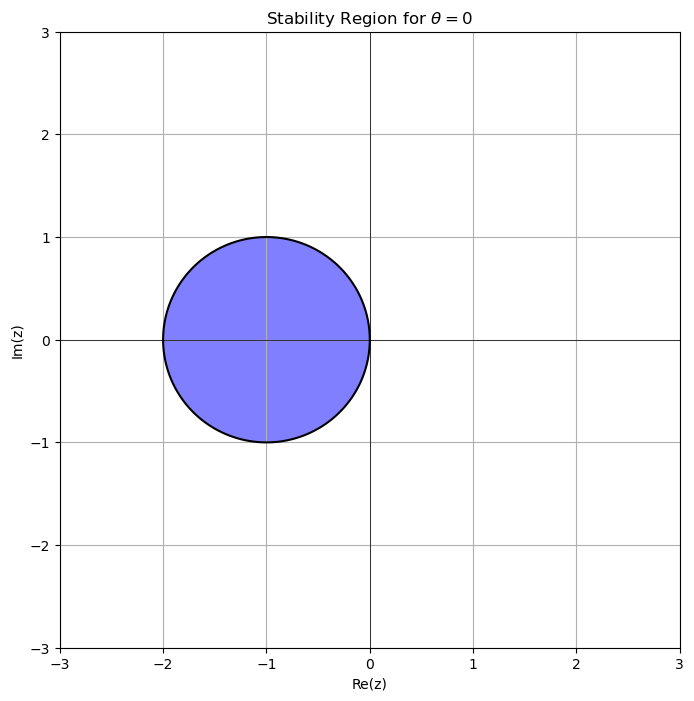

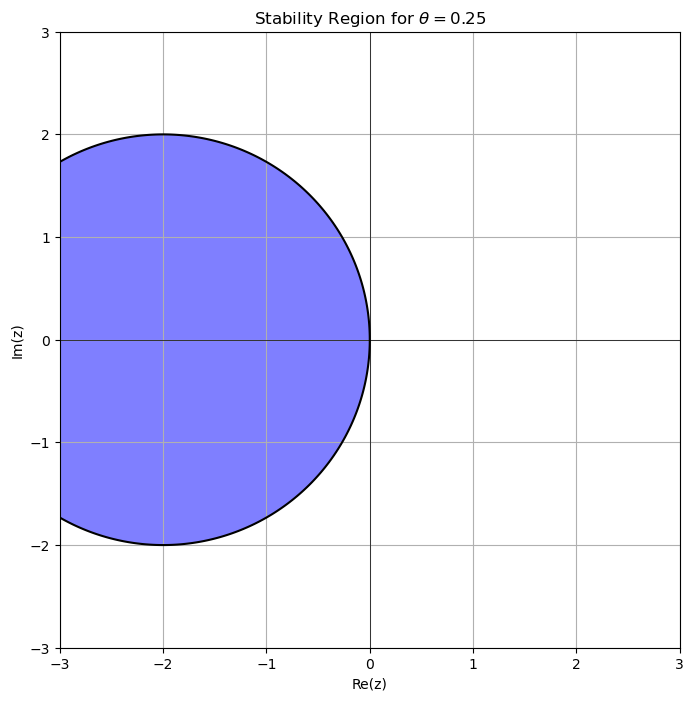

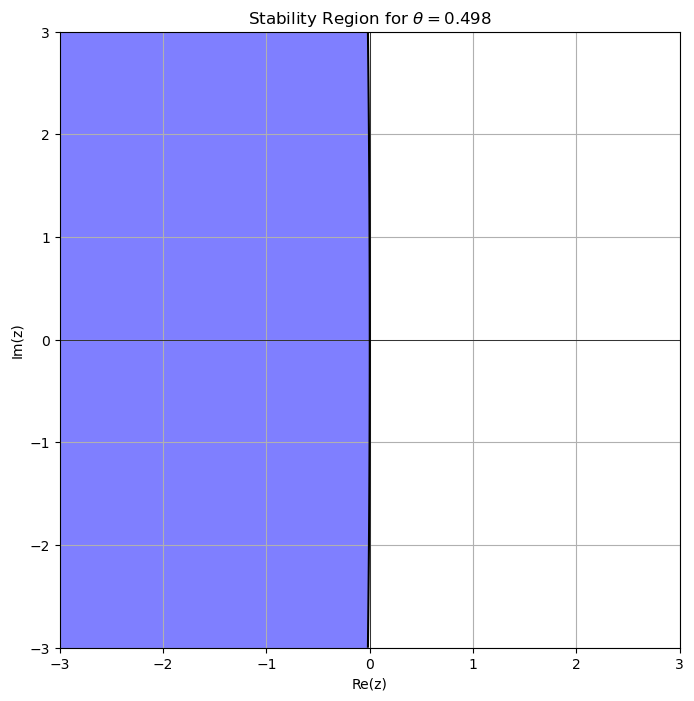

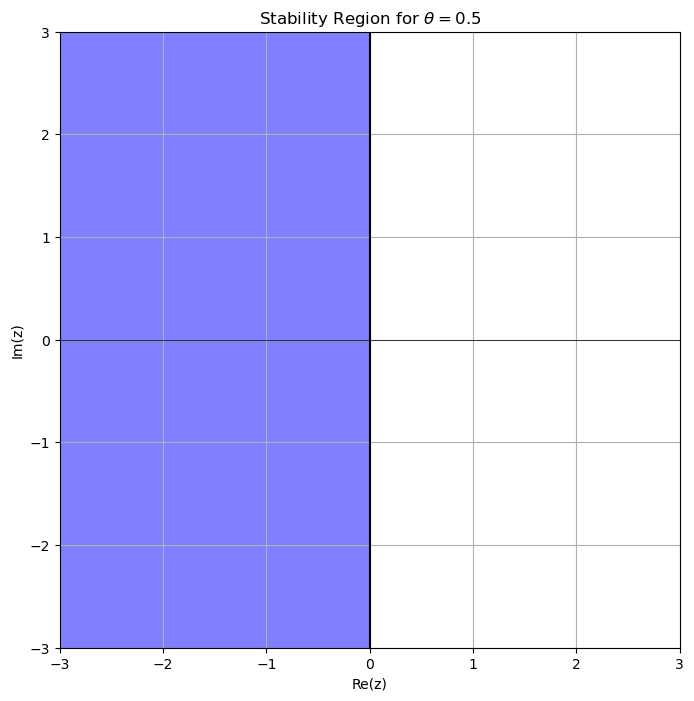

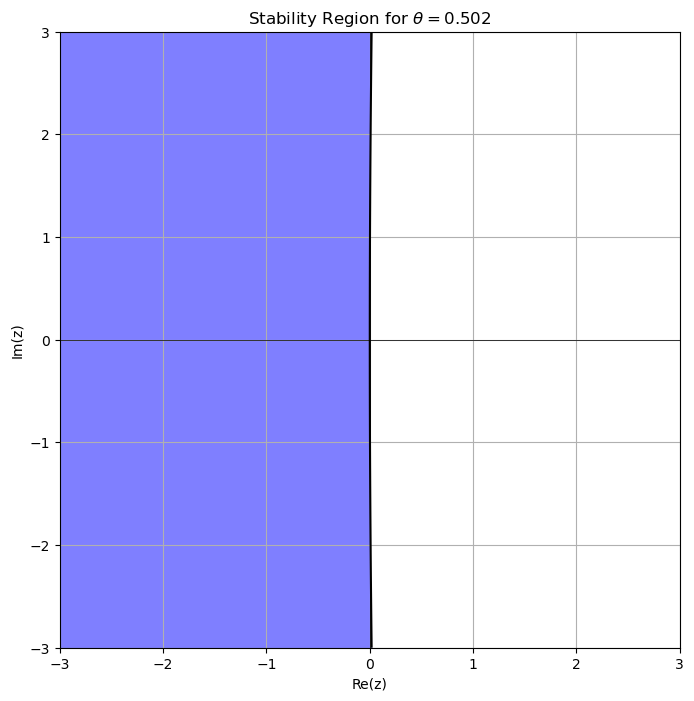

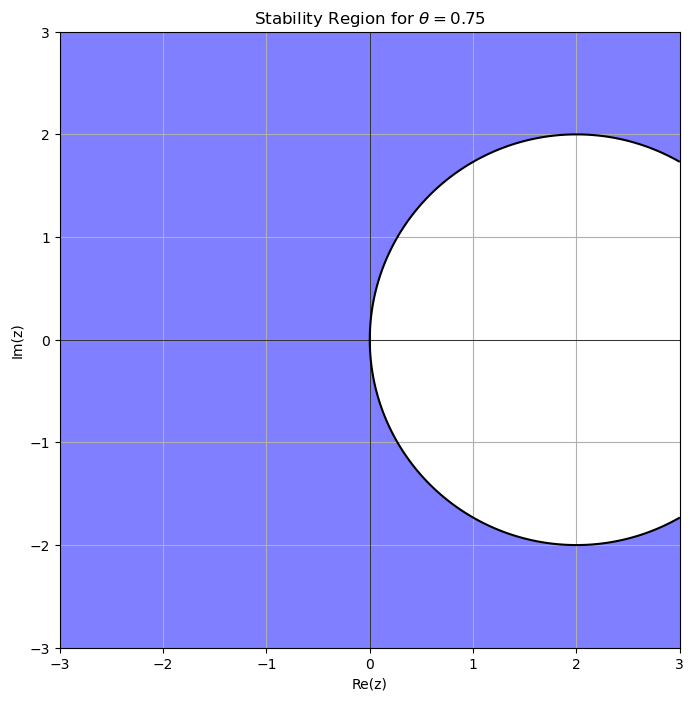

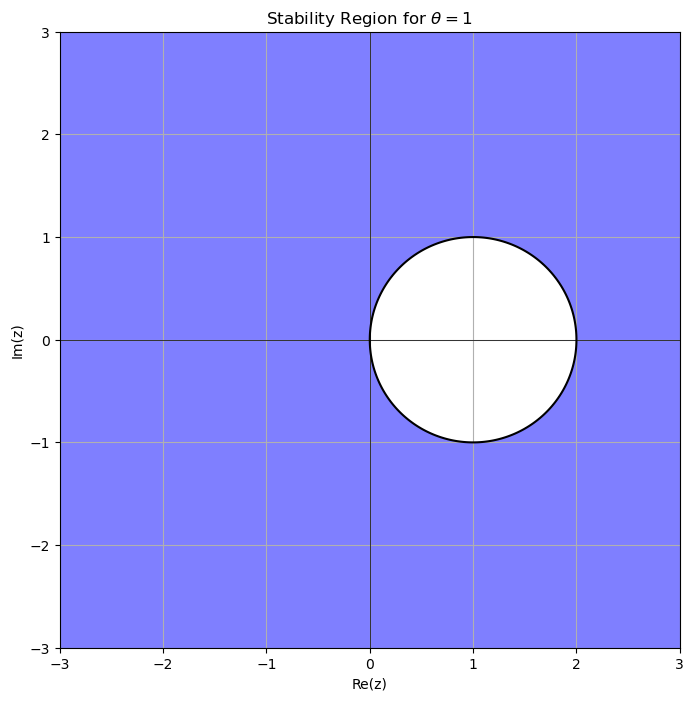

In [13]:
def imshow_plot_u(U, Lx, Ly, cblabel=r'$U$'):
    """
    Visualizes a 2D array `U` as a heatmap using matplotlib's imshow function.
    Parameters:
    -----------
    U : numpy.ndarray
        A 2D array representing the data to be visualized.
    Lx : float
        The length of the domain in the x-direction.
    Ly : float
        The length of the domain in the y-direction.
    cblabel : str, optional
        Label for the colorbar. Default is r'$U$'.
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The figure object containing the plot.
    ax : matplotlib.axes._subplots.AxesSubplot
        The axes object containing the plot.
    Notes:
    ------
    - The colormap used is 'RdBu_r', which is a diverging colormap.
    - The color limits are set to the minimum and maximum values of `U`.
    - The x and y axes are labeled as r'$x$' and r'$y$', respectively.
    - The colorbar is added to the plot with the specified label.
    """
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    img = ax.imshow(U, cmap='RdBu_r', interpolation='bilinear', extent=[-Lx/2, Lx/2, -Ly/2, Ly/2])
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    cbar = plt.colorbar(img, ax=ax)
    cbar.set_label(cblabel)
    img.set_clim(vmin=U.min(), vmax=U.max())
    return fig, ax

def imshow_plot_ut(U, t, Lx, Ly, cblabel=r'$U$'):
    """
    Visualizes a 2D array `U` as an image with a colorbar and adds a time annotation.
    Parameters:
    -----------
    U : ndarray
        A 2D array representing the data to be visualized.
    t : float
        The time value to be displayed as an annotation on the plot.
    Lx : float
        The length of the domain in the x-direction.
    Ly : float
        The length of the domain in the y-direction.
    cblabel : str, optional
        The label for the colorbar. Default is r'$U$'.
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The figure object containing the plot.
    ax : matplotlib.axes.Axes
        The axes object containing the plot.
    """
    
    fig, ax = imshow_plot_u(U, Lx, Ly, cblabel)
    tx = ax.text(0, Ly/2*1.1, f"t={t:.3f}",
                 bbox=dict(boxstyle="round", ec='white', fc='white'))
    return fig, ax

def plot_stability_domain(r, xlim=(-3, 3), ylim=(-3, 3), resolution=500):
    """
    Plots the stability domain of a given rational function r(z) where |r(z)| <= 1.
    
    Parameters:
    - r: A function representing the rational function r(z).
    - xlim: Tuple representing the x-axis limits for the plot.
    - ylim: Tuple representing the y-axis limits for the plot.
    - resolution: The number of points along each axis for the grid.
    """
    
    # Create a grid of complex numbers
    x = np.linspace(xlim[0], xlim[1], resolution)
    y = np.linspace(ylim[0], ylim[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    
    # Compute |r(z)| on the grid
    R = np.abs(r(Z))
    
    # Plot the stability domain
    plt.figure(figsize=(8, 8))
    plt.contourf(X, Y, R, levels=[0, 1], colors=['blue'], alpha=0.5)
    plt.contour(X, Y, R, levels=[1], colors=['black'])
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')
    plt.title(rf'Stability Region for $\theta={theta}$')
    plt.grid(True)

theta_list = [0, 0.25, 0.498, 0.5, 0.502, 0.75, 1] 

for theta in theta_list:
    def r(z):
        return (1 + z * (1 - theta)) / (1 - theta * z)

    plot_stability_domain(r)
plt.show()

A-Stability occurs when the whole left plane, $z<0$, is stable. Based on the plots, we will have A-stability when $\theta = \{0.5,0.502, 0.75, 1\}$. Hence, we conjecture that A-stability occurs for $\theta\in[0.5, 1]$. 

This conicdes with the result from the 3i theoretical, where $\theta = 1/2$ and $\theta = 1$ result in the Crank–Nicolson and Implicit Euler methods, respectively. Both methods are implicit and known to be A-stable.

Furthermore, the plots indicate that the boundary between the stable and unstable region of the $\theta$ method is always a circle with a center on the $\text{Re}(z)$ -axis. This circle has a finite center and radius apart from when $\theta=0.5$. When $\theta \rightarrow 0.5$, the center approaches the coordinates $(-\infty, 0)$ and the radius, $r$ approaches infinity. It seems that when $\theta \leq 0.5$, the center of the circle is located at $(-r,0)$ and when $\theta > 0.5$ it is located at $(r,0)$.


<br>

## (iii)

In 3ii theoretical, we found that the stability function for the $\theta$-method is

$$
r_{\theta}(z) = 1 + \frac{z}{1-\theta z}, \qquad z=\lambda \tau,
\tag{31}
$$

for the eq. $(26)$. The exact solution to eq. $(26)$ is
$$
y(t)=y_0 e^{\lambda t} \text{.}
\tag{32}
$$

In the case of A-stability, we have $\lambda < 0$, which leads to exponential decay. The solution is then stable for all $z$ such that $|r_{\theta}(z)| \le 1$. Hence, 

$$
\begin{align*}
\left|1 + \frac{z}{1-\theta z}\right| &< 1 \\
\left(1+ \frac{z}{1-\theta z}\right)^2 &< 1 \\
\left(\frac{1-\theta z + z}{1-\theta z}\right)^2 &< 1 \\
(1 - \theta z + z)^2 &< (1 - \theta z)^2 \\
1 - \theta z + z - \theta z + \theta^2z^2 - \theta z^2
+ z - \theta z^2 + z^2 &< 1 - 2\theta z + \theta^2 z^2 \\
\cancel{1 - 2\theta z + \theta^2 z^2} + 2z + 2\theta z^2 + z^2 &< \cancel{1 - 2\theta z + \theta^2 z^2} \\
2z\left(1-\theta z + \frac{1}{2}z\right) &< 0. \\
\end{align*}
$$

Since $\lambda\tau = z$, and $\tau>0$, we know that $z<0$. As such, 
$$
\begin{align*}
1 - \theta z + \frac{1}{2}z &> 0 \\
1 &> \left(\theta - \frac{1}{2}\right)z \\
z &< \left(\theta - \frac{1}{2}\right)^{-1}.
\end{align*}
$$

If we square both sizes, we arrive at 

$$\begin{equation*}
z^2 = a^2 + b^2 < \left(\theta - \frac{1}{2}\right)^{-2} \text{.}
\end{equation*}$$

We may recognise this as as the equation for a circle with
$$
r \propto \left(\theta - \frac{1}{2}\right)^{-1} \text{.}
\tag{33}
$$

We see that when $\theta \rightarrow \infty$, the radius of the stability region is $0$, and when $\theta = 1/2$, the radius of the stability region goes to infinity.

<br>

# Task 3 Computational

## (i)

In this task we will solve the transient biharmonic equation using the $\theta$-method and Fourier transform. The transient biharmonic equation being solved is given by  

$$\begin{align}
    \partial_t u(x,y,t) + \kappa \Delta^2 u(x,y,t)  = 
    g (x,y,t) \qquad u_0=u(x,y,0), \qquad \kappa\geq 0.
    \tag{34}
\end{align}$$

Here, $g$ is a source term and $u$ is our manufractured solution that we define. 


<br>

We define the time intervals, $dt$ as 

$$
dt = \frac{T-t_0}{N_t}=\tau,
$$

where $t_0$ and $T$ are the initial and final time, respectively. Hence, $T-t_0$ is the total time, and $N_t$ is the number of timesteps. 

To calculate $u_{n+1}$, for these time steps, we use the $\theta$-method given by 

$$\begin{align}
U^{n+1} = U^{n} + \tau 
\left[ 
    \theta F(t_{n+1}, U^{n+1}) + (1 - \theta) F(t_n, U^n)
\right].
\tag{35}
\end{align}$$

<br>


Solving eq. $(34)$ directly is difficult. To simplfiy computations, we use the Fourier transform on eq. $(34)$, conveniently rewritten as 

$$\begin{aligned}
\partial_t u =g - \kappa \Delta^2 u.
\tag{36}
\end{aligned}$$

We define 
$$
\mathcal{F}[ u(x, y, t_n )](k_x, k_y) 
= \hat{u}(k_x, k_y)_n
= \hat u_n
\tag{37}
$$ 

and 

$$
\mathcal{F}[g(x, y, t_n)](k_x, k_y) 
= \hat{g}(k_x, k_y)_n 
= \hat g_n
\text{.}
\tag{38}
$$ 

Then, we transform both sides of eq. $(36)$ to obtain

$$\begin{align}
\partial_t \hat{u}_n =\hat{g}_n - 
\kappa \tilde{k}_4 \hat{u}_n=F(t_n,\hat{u}_n), 
\qquad \hat{u}_0=\hat{u}(k_x,k_y,0),
\tag{39}
\end{align}$$

where $\tilde{k}_4$ is defined as in task 2 and comes from the Fourier transform of the biharmonic operator $\Delta^2 = \nabla^4$. 

<br>


Substituting eq. $(39)$ into eq. $(35)$, and solving for $\hat u_{n+1}$, the result is

$$\begin{align}
\hat{u}_{n + 1} = 
\left(
     1-\frac{\tau \kappa \tilde{k_4}}{1 + \theta\tau\kappa\tilde{k_4}}
\right)
\hat{u}_n + \frac{\tau}{1 + \theta \tau \kappa \tilde{k_4}} 
\left[ 
    \theta\hat{g}_{n+1} + (1-\theta)\hat{g}_n 
\right].
\tag{40}
\end{align}$$

This equation is solved numerically by iterating for each time step, $t_{n+1}=t_n+\tau$, to compute $\hat u_{n+1}$ form $\hat{u}_n$. Thereafter, we use inverse Fourier transform to obtain the real space solution $u$. 

<br>

### Stability Analysis

If $g = 0, \ \forall t$, then eq. $(40)$ can be simplified as

$$\begin{align}
\hat{u}_{n+1}=R_{\theta}(z)^{n+1}\hat{u}_0,
\tag{41}
\end{align}$$

where $R_{\theta}(z)$ is the stability function for the $\theta$ method given by

$$\begin{align}
R_{\theta}(z)=1+\frac{z}{1-\theta z}, \qquad z=-\tau \kappa \tilde{k}_4.
\tag{42}
\end{align}$$

If $|R_\theta (z)| \le 1$, the solution will remain stable over time. 

<br>

## (ii)

In [ ]:
def transient_biharmonic_solver(*, kappa, 
                                   X, Y, U0, 
                                   t0, T, Nt, 
                                   theta=0.5,
                                   g=None):
    """
    Solve the transient biharmonic equation using the theta method.

    Parameters:
    ----------- 
    kappa (float): Diffusion coefficient.
    X (ndarray): 2D array of x-coordinates.
    Y (ndarray): 2D array of y-coordinates.
    U0 (ndarray): Initial condition array.
    t0 (float): Initial time.
    T (float): Final time.
    Nt (int): Number of time steps.
    theta (float): Constant in the theta-method. Default value is 0.5.
    g (callable, optional): Source term function g(X, Y, t). Defaults to None.

    Yields:
    -------
    tuple: A tuple containing the discrete Fourier transform of U at t, and the current time t.
    """

    # Extract grid data
    x, y = X[0,:], Y[:,0]
    Nx, Ny = len(x), len(y)
    if Nx < 2 or Ny < 2:
        raise ValueError("Grids must have at least two points in each space direction!")
    dx, dy = x[1] - x[0], y[1] - y[0]     # Distance between samples

    # Compute wave number grid
    kx = fftfreq(Nx, d=dx/(2*np.pi))
    ky = fftfreq(Ny, d=dy/(2*np.pi))
    KX, KY = np.meshgrid(kx, ky, sparse=True)
    K4=KX**4+KY**4+2*KX**2*KY**2 # Biharmonic operator

    U_hat = fft2(U0)    # Compute Fourier transform of the initial value

    # Time stepping 
    t = t0 
    dt = (T-t0)/Nt

    # Yield the initial solution and initial time.
    yield U_hat, t 
   
    while t < T-dt/2:
        # Solve for next time step and update time
        if g is not None:
            G_hat_np1 = fft2(g(X,Y,t+dt))
            G_hat_n = fft2(g(X,Y,t))
        else:
            G_hat_np1 = 0
            G_hat_n = 0
        
        
        #U_{n+1}=R(z)*U_{n}+g_term
        g_term=dt*(theta*G_hat_np1+(1-theta)*G_hat_n)/(1+kappa*K4*theta*dt)
        R_term=1-((dt*kappa*K4)/(1+dt*theta*K4*kappa))
        U_hat=U_hat*R_term+g_term 

        t=t+dt
        yield U_hat, t

def manufacture_solution_td_biharmonic(u_str, kappa):
    '''
    INPUT
        u_str:  String. Solution of the time dependent biharmonic equation.
        kappa:  Float. Gradient energy coefficient.
    
    OUTPUT
        u:  Callable. u_str written as a callable function.
        g:  Callable. Source term of TD biharmonic equation.
    '''
    import sympy as sy
    from sympy import sin, cos, exp
    x, y, t = sy.symbols('x y t')
    u_sy = eval(u_str)
    biharm = lambda u: sy.diff(u, x, x, x, x) + sy.diff(u, y, y, y, y)+2*sy.diff(u, x, x, y, y)
    g_sy =  sy.diff(u_sy, t) + kappa*sy.simplify(biharm(u_sy))
    u = sy.lambdify((x, y, t), u_sy, modules='numpy')
    g = sy.lambdify((x, y, t), g_sy, modules='numpy')
    print(f'u = {u_sy}')
    print(f'u0 = {u_sy.subs(t, 0)}')
    print(f'g = {g_sy}')
    return u, g

In [ ]:
# Define exact solution
kappa=1
u_str_32='sin(x)*cos(y)*exp(-4*kappa*t)' #lambda=4 gives g=0
u_ex32, g_32=manufacture_solution_td_biharmonic(u_str_32, kappa)

# Grid and time data
Lx, Ly = 2*np.pi, 2*np.pi
Nx, Ny = 20,20
t0 , T = 0, 1
Nt_arr=np.array([10,20,40,80,160,320,640])
theta_arr=np.array([1,0.5,0])
x = np.linspace(-Lx/2, Lx/2, Nx, endpoint=False)
y = np.linspace(-Ly/2, Ly/2, Ny, endpoint=False)
X, Y = np.meshgrid(x, y, sparse=True)

U0_32 = u_ex32(X,Y,0) # Start value

for theta in theta_arr:  
    index=0

    # Error array setup
    max_err_arr=np.zeros(len(Nt_arr))

    for Nt in Nt_arr:
        max_err=0
        solver = transient_biharmonic_solver(kappa=kappa, 
                                        X=X, Y=Y, U0=U0_32, 
                                        t0=t0, T=T, Nt=Nt, 
                                        theta=theta,
                                        g=None)

        for U_hat, t in solver:
            U32=ifft2(U_hat).real # Inverse Fourier transform
            U_ex32=u_ex32(X,Y,t)  # Exact solution for whole grid at time t
            U_err_32=U32-U_ex32
            err_t=np.amax(abs(U_err_32)) # Max error at time t
            # Evaluate maximum error for entire period T-t0 for a specific Nt
            if err_t>max_err:
                max_err=err_t

        max_err_arr[index]=max_err
        index+=1

    # Compute EOC after going through all Nt for one theta-value
    EOC32=np.log(max_err_arr[:-1]/max_err_arr[1:])/np.log(Nt_arr[1:]/Nt_arr[:-1])
    EOC32 = np.insert(EOC32, 0, np.inf)

    print('\n EOC for task 3.2 theta = '+str(theta))
    print('\n')
    table32 = pd.DataFrame({'Nt': Nt_arr, 'Error': max_err_arr, 'EOC': EOC32})
    print(table32) 
    print('\n \n')


# CFL condition for theta=0
dx, dy = x[1] - x[0], y[1] - y[0]
kx = fftfreq(Nx, d=dx)*2*np.pi
ky = fftfreq(Ny, d=dy)*2*np.pi
KX, KY = np.meshgrid(kx, ky, sparse=True)
# CFL condition is dt<-2/lam
# lam=-kappa*K4, the largest K4 gives the largest Nt
K4=np.amax(KX**4+KY**4+2*KX**2*KY**2) 
CFL=int(kappa*K4*(T-t0)/2) # N_CFL
Nt_CFL_arr=np.array([0.5*CFL,CFL,2*CFL,4*CFL])

index=0
max_err_arr=np.zeros(len(Nt_CFL_arr))

# Repeat computation, but with different Nt array and only for theta=0
for Nt in Nt_CFL_arr:
    max_err=0
    solver=transient_biharmonic_solver(kappa=kappa, 
                                    X=X, Y=Y, U0=U0_32, 
                                   t0=t0, T=T, Nt=Nt, 
                                   theta=0,
                                   g=None)
    for U_hat, t in solver:
        U32=ifft2(U_hat).real
        U_ex32=u_ex32(X,Y,t)
        U_err_32=U32-U_ex32
        err_t=np.amax(abs(U_err_32)) # Max error at time t

        # Evaluate maximum error for entire period T for a specific Nt
        if err_t>max_err:
            max_err=err_t

    max_err_arr[index]=max_err
    index+=1

# Calculate EOC
EOC32=np.log(max_err_arr[:-1]/max_err_arr[1:])/np.log(Nt_CFL_arr[1:]/Nt_CFL_arr[:-1])
EOC32 = np.insert(EOC32, 0, np.inf)

print('\n EOC for theta=0 with N_CFL \n')
table32 = pd.DataFrame({'Nt': Nt_CFL_arr, 'Error': max_err_arr, 'EOC': EOC32})
print(table32) # Use 'display' when transferring to Jupyter!
print('\n \n')

u = exp(-4*t)*sin(x)*cos(y)
u0 = sin(x)*cos(y)
g = 0

 EOC for task 3.2 theta = 1.0


    Nt     Error       EOC
0   10  0.063237       inf
1   20  0.033998  0.895320
2   40  0.017664  0.944656
3   80  0.009010  0.971194
4  160  0.004551  0.985292
5  320  0.002287  0.992567
6  640  0.001147  0.996263

 


 EOC for task 3.2 theta = 0.5


    Nt     Error       EOC
0   10  0.004898       inf
1   20  0.001232  1.991623
2   40  0.000307  2.004710
3   80  0.000077  2.001173
4  160  0.000019  2.000293
5  320  0.000005  2.000073
6  640  0.000001  2.000018

 


 EOC for task 3.2 theta = 0.0


    Nt          Error         EOC
0   10   1.213554e+18         inf
1   20   5.426688e+47  -98.496749
2   40  4.018877e+101 -178.950838
3   80  2.934174e+197 -318.451259
4  160            inf        -inf
5  320            inf         NaN
6  640            inf         NaN

 



C:\Users\edvar\AppData\Local\Temp\ipykernel_7328\3754265854.py:61: RuntimeWarning: overflow encountered in multiply
  U_hat=U_hat*R_term+g_term
C:\Users\edvar\AppData\Local\Temp\ipykernel_7328\3754265854.py:61: RuntimeWarning: invalid value encountered in multiply
  U_hat=U_hat*R_term+g_term
C:\Users\edvar\AppData\Local\Temp\ipykernel_7328\2587933068.py:45: RuntimeWarning: invalid value encountered in divide
  EOC32=np.log(max_err_arr[:-1]/max_err_arr[1:])/np.log(Nt_arr[1:]/Nt_arr[:-1])
C:\Users\edvar\AppData\Local\Temp\ipykernel_7328\2587933068.py:45: RuntimeWarning: divide by zero encountered in log
  EOC32=np.log(max_err_arr[:-1]/max_err_arr[1:])/np.log(Nt_arr[1:]/Nt_arr[:-1])
C:\Users\edvar\AppData\Local\Temp\ipykernel_7328\3754265854.py:61: RuntimeWarning: overflow encountered in multiply
  U_hat=U_hat*R_term+g_term
C:\Users\edvar\AppData\Local\Temp\ipykernel_7328\3754265854.py:61: RuntimeWarning: invalid value encountered in multiply
  U_hat=U_hat*R_term+g_term



 EOC for theta=0 with N_CFL 

        Nt     Error      EOC
0  10000.0       inf      inf
1  20000.0  0.000037      inf
2  40000.0  0.000018  1.00006
3  80000.0  0.000009  1.00003

 



The EOC-values for $\theta=1$ and $\theta=0.5$ are consistent with what is written in task 3i theoretical. 
In that task we concluded that with $\theta=1$, the method reduces to the implicit or backward Euler method, which has an order of convergence of $1$. Indeed, we can see from the table for $\theta=1$ that the EOC does seem to converge to $1$ for increasing $N_t$. 

Similarly, we concluded in task 3i theoretical that the $\theta$ method reduces to the Crank-Nicolson method for $\theta=0.5$. The EOC-values for $\theta=0.5$ given in a table of increasing $N_t$ seem to converge to $2$, which is exactly the order of convergence of the Crank-Nicolson method.

Following this logic, one would expect the EOC to converge to $1$ for $\theta=0$ as this is the order of convergence for the explicit or forward Euler method. Instead, the error only grows larger and the EOC does not converge at all. The explanation for that is simply that the timesteps $\tau$ are too large, or in other words, $N_t$ is too small. The stability function of the forward Euler method is in this case

$$\begin{equation}

R(z)=1+z=1+\tau \lambda = 1-\tau \kappa \tilde{k}_4,
\tag{43}

\end{equation}$$

which only converges if 

$$\begin{equation}

\lvert R(z) \rvert < 1 \Leftrightarrow \tau <\frac{2}{\lvert \kappa \tilde{k}_4 \rvert} \Leftrightarrow N_t > \frac{\lvert \kappa \tilde{k}_4 \rvert \cdot (T-t_0)}{2}=N_{CFL}.
\tag{44}

\end{equation}$$

In essence, we need larger $N_t$ to find the EOC for $\theta=0$. In this case $N_{CFL}=20000$ and we see in the table that for $N_t$ above this value, the EOC does seem to converge to $1$.

<br>

## (iii)

In [ ]:
kappa=1
u_str_33='(exp(1+sin(x)**2)+exp(1+cos(y)**2))*exp(-4*kappa*t)'
theta_arr33=np.array([1,0.5])
u_ex33, g_33=manufacture_solution_td_biharmonic(u_str_33, kappa)

# Grid and time data
Lx, Ly = 2*np.pi, 2*np.pi
Nx, Ny = 20,20
t0 , T = 0, 1
Nt_arr=np.array([10,20,40,80,160,320,640])
x = np.linspace(-Lx/2, Lx/2, Nx, endpoint=False)
y = np.linspace(-Ly/2, Ly/2, Ny, endpoint=False)
X, Y = np.meshgrid(x, y, sparse=True)

U0 = u_ex33(X,Y,0)

#Same procedure as in the previous task
for theta in theta_arr33:  
    index=0
    max_err_arr=np.zeros(len(Nt_arr))
    for Nt in Nt_arr:
        max_err=0
        solver = transient_biharmonic_solver(kappa=kappa, 
                                        X=X, Y=Y, U0=U0, 
                                        t0=t0, T=T, Nt=Nt, 
                                        theta=theta,
                                        g=g_33)

        for U_hat, t in solver:
            U33=ifft2(U_hat).real
            U_ex33=u_ex33(X,Y,t)
            U_err_33=U33-U_ex33
            err_t=np.amax(abs(U_err_33)) # Max error at time t

            if err_t>max_err:
                max_err=err_t
        max_err_arr[index]=max_err
        index+=1

    EOC33=np.log(max_err_arr[:-1]/max_err_arr[1:])/np.log(Nt_arr[1:]/Nt_arr[:-1])
    EOC33 = np.insert(EOC33, 0, np.inf)
    print('\n EOC for task 3.3 theta = '+str(theta))
    print('\n')
    table33 = pd.DataFrame({'Nt': Nt_arr, 'Error': max_err_arr,'EOC': EOC33})
    print(table33) 
    print('\n \n')

u = (exp(sin(x)**2 + 1) + exp(cos(y)**2 + 1))*exp(-4*t)
u0 = exp(sin(x)**2 + 1) + exp(cos(y)**2 + 1)
g = 4*((4*sin(x)**8 + 16*sin(x)**6 - 4*sin(x)**4 - 12*sin(x)**2 + 1)*exp(sin(x)**2 + 1) + (4*sin(y)**8 - 32*sin(y)**6 + 68*sin(y)**4 - 44*sin(y)**2 + 5)*exp(cos(y)**2 + 1))*exp(-4*t) - 4*(exp(sin(x)**2 + 1) + exp(cos(y)**2 + 1))*exp(-4*t)

 EOC for task 3.3 theta = 1.0


    Nt     Error       EOC
0   10  1.754152       inf
1   20  0.907759  0.950392
2   40  0.461588  0.975703
3   80  0.232725  0.987983
4  160  0.116845  0.994022
5  320  0.058544  0.997012
6  640  0.029303  0.998493

 


 EOC for task 3.3 theta = 0.5


    Nt     Error       EOC
0   10  0.124811       inf
1   20  0.031284  1.996256
2   40  0.007825  1.999260
3   80  0.001955  2.001207
4  160  0.000489  1.999686
5  320  0.000122  1.998356
6  640  0.000044  1.460519

 



As seen in the error-EOC tables, a different solution to the time-dependent biharmonic equation once again makes the EOC-values converge to $1$ and $2$ for $\theta=1$ and $\theta=0.5$, respectively.

However, we would like to address the abnormal EOC-value for $\theta=0.5$, $N_t=640$. While all the other EOC-values in the table from $N_t=20$ onward are around $2$, the EOC-value suddenly drops to around $1.5$ for $N_t=640$. If one would have computed the EOC for even larger $N_t$, one would have seen a gradual decline in the EOC-values. The reason for the drop in EOC is that for this particular solution of the time-dependent biharmonic equation, the error as a result of discrete timesteps is practically zero for $N_t\geq 640$, so increasing $N_t$ will not reduce the error that much anymore. If one wishes to reduce the error of the numerical solution even further, one would have to reduce the length of the spatial steps, i.e. increase $N_x$ and $N_y$. When $N_x=N_y=20$ and $N_t=640$, the spatial sampling frequency is very low compared to the temporal sampling frequency, making the former the principal contributor to the numerical error. Therefore, if we had increased $N_x$ and $N_y$, the abnormal EOC-value for $\theta=0.5$ would have disappeared. 

<br>

<br>

## Task 4

## (i)

In this task, we will brief through how we can use an IMEX solver to solve the Cahn-Hilliard equation, which takes the general form 

$$\begin{align}
    \partial_t{ u(x,y,t) } -\nabla \cdot [
        M \nabla (f(u(x,y,t))-\kappa \Delta u(x,y,t))]
        = g(x,y,t) 
    \tag{45}
\end{align}$$

on the domain $\Omega \times (0,T)$. Here, $g$ is a source term, and $f(u)$ is a non-linear function defined to be

$$\begin{align}
    f(u)=u^3-u.
    \tag{46}
\end{align}$$

Additionally, $\kappa \geq 0$ and we set $M=1$. Eq. $(45)$ is solved using an IMEX time-stepping scheme based on the Euler-method with convex splitting, where the linear terms are treated implicitly on the left-hand side, while the non-linear terms are treated explicitly on the right-hand side. Before we can implement this scheme, however, we need to simplify eq. $(45)$:

$$\begin{align}

\partial_t{u}-\nabla \cdot [\nabla (f(u)-\kappa \Delta u)]=g \nonumber \\
\partial_t{u}-\Delta f(u)-\kappa \Delta^2 u=g \nonumber \\
\partial_t{u}-\kappa \Delta^2 u -g = \Delta f(u),
\tag{47}

\end{align}$$

where we have assumed that we may treat $g$ as a linear function. Eq. $(47)$ is now written in the form required by the IMEX solver. The IMEX-solver applied to this equation is given by

$$\begin{align}
u_{n+1}+\tau (\kappa \Delta ^2 u_{n+1}-g_{n+1})=u_n+\tau \Delta f(u_n), \qquad u(x,y,t_n)=u_n,
\tag{48}
\end{align}$$

where $\tau=t_{n+1}-t_n$ is the length of the timestep. Since $f(u)$ consists of one linear and one non-linear term, it would be fitting to transfer the linear term over to the left-hand side. However, moving the entire linear term could cause issues later on, which is why we rather split it (convex splitting), and only move part of it to the left-hand side. Substituting 

$$\begin{aligned}
\Delta f(u)= \Delta (\alpha u - (1+\alpha) u + u^3) \\
f_1(u)=\alpha u \\
f_2(u)=u^3-(1+\alpha)u
\tag{49}
\end{aligned}$$

into eq. $(48)$ we get

$$\begin{align}
u_{n+1}+\tau (\kappa \Delta ^2 u_{n+1}-g_{n+1}-\Delta \alpha u_n)=u_n-\tau \Delta ((1+\alpha) u_n - u_n^3).
\tag{50}
\end{align}$$

Then, we clean up so that all $u_{n+1}$ -terms end up un the left-hand side:

$$\begin{align}
\left ( \frac{1}{\tau} + \kappa \Delta^2 -\alpha \Delta \right)u_{n+1}=\frac{u_n}{\tau}+ \Delta f_2(u_n) + g_{n+1}.
\tag{51}
\end{align}$$

The easiest way to numerically deal with the $\Delta$ and $\Delta^2$ operators is, as we have seen, by using the Fourier transform on the entire equation. However, because of the non-linear term $u^3$ in $f_2(u)$, it can be computationally costly in this case. Therefore, $f_2(u)$ is first computed in real space before eq. $(51)$ undergoes Fourier transform and $\hat{u}(k_x, k_y)_{n+1}=\mathcal{F}[u(x,y)_{n+1}](k_x,k_y)$ is calculated. To find $\hat{u}_{n+2}$, $\hat{u}_{n+1}$ must undergo an inverse Fourier transform so that $f_2(u_{n+1})$ can be calculated in real space. These steps sum up our numerical method for this task:

1. Compute $f_2(u_n)$
$$\begin{align*}
f_2(u_n)=u_n^3-(1+\alpha)u_n.
\end{align*}$$

2. Fourier transform eq. $(51)$ and compute $\hat{u}_{n+1}$

$$\begin{align*}
\hat{u}_{n+1}=\frac{\hat{u}_n/ \tau+ \tilde{k}_2 \hat{f_2}(u_n) + \hat{g}_{n+1}}{1/ \tau + \kappa \tilde{k}_4 -\alpha \tilde{k}_2},
\end{align*}$$

where 

$$\begin{align*}
\tilde{k}_2 = -\frac{4\pi^2k_x^2}{L_x^2} - \frac{4\pi^2k_y^2}{L_y^2}, \qquad \tilde{k}_4={\tilde{k}_2}^2.
\end{align*}$$

3. Find $u_{n+1}$ by inverse transform

$$\begin{align*}
u_{n+1}(x,y)=\mathcal{F}^{-1}[\hat{u}(k_x,k_y)_{n+1}](x,y).

\end{align*}$$

4. Update time and yield result

$$\begin{align*}
t_{n+1}=t_n+\tau.

\end{align*}$$

Repeat until $t_n=T$.


## (ii)

In [14]:
def cahn_hilliard_backward_euler(*, 
                                kappa, 
                                X, Y, U0, 
                                t0, T, Nt,
                                g, 
                                alpha=1.5):
    """
    Implements the Cahn-Hilliard equation solver using the backward Euler method 
    with a convex-concave splitting approach.

    Parameters:
    -----------
    kappa : float
        Diffusion coefficient for the biharmonic operator.
    X : ndarray
        2D array representing the x-coordinates of the grid.
    Y : ndarray
        2D array representing the y-coordinates of the grid.
    U0 : ndarray
        Initial condition for the solution.
    t0 : float
        Initial time.
    T : float
        Final time.
    Nt : int
        Number of time steps.
    g : callable or None
        Source term as a function of (X, Y, t). If None, no source term is applied.
    alpha : float, optional
        Convex-concave splitting parameter. Default is 1.5.

    Yields:
    -------
    tuple: A tuple containing the discrete Fourier transform of U at t, and the current time t.

    """

    # Extract grid data
    x, y = X[0,:], Y[:,0]
    Nx, Ny = len(x), len(y)
    if Nx < 2 or Ny < 2:
        raise ValueError("Grids must have at least two points in each space direction!")
    dx, dy = x[1] - x[0], y[1] - y[0]     # Distance between samples

    # Compute wave number grid
    kx = fftfreq(Nx, d=dx/(2*np.pi))
    ky = fftfreq(Ny, d=dy/(2*np.pi))
    KX, KY = np.meshgrid(kx, ky, sparse=True)
    K2=-KX**2-KY**2
    K4=KX**4+KY**4+2*KX**2*KY**2 # Biharmonic operator

    U_hat = fft2(U0)    # Compute Fourier transform of the initial value
    f2=U0**3-(1+alpha)*U0
    F2=fft2(f2)

    # Time stepping 
    t = t0 
    dt = (T-t0)/Nt

    # Yield the initial solution and initial time.
    yield U0, t 


    while t < T-dt/2:
        # Solve for next time step and update time
        if g is not None:
            G_hat_np1 = fft2(g(X,Y,t+dt))
        else:
            G_hat_np1 = 0
        
        U_hat=(K2*F2+(U_hat/dt)+G_hat_np1)/((1/dt)+kappa*K4-alpha*K2)
        U_n=ifft2(U_hat).real
        f2=U_n**3-(1+alpha)*U_n
        F2=fft2(f2)
        t=t+dt
        yield U_n, t

# Assume M=1 
def manufacture_solution_cahn_hillard_be(u_str, kappa):
    '''
    INPUT
        u_str:  String. Solution of the Cahn-Hilliard equation.
        kappa:  Float. Gradient energy coefficient.
    
    OUTPUT
        u:  Callable. u_str written as a callable function.
        g:  Callable. Source term of CH-equation.
    '''
    import sympy as sy
    from sympy import sin, cos, exp
    x, y, t = sy.symbols('x y t')
    u_sy = eval(u_str)
    biharm = lambda u: sy.diff(u, x, x, x, x) + sy.diff(u, y, y, y, y)+2*sy.diff(u, x, x, y, y)
    laplacian= lambda u: -sy.diff(u**3-u,x,x)-sy.diff(u**3-u,y,y)
    g_sy =  sy.diff(u_sy, t) + kappa*sy.simplify(biharm(u_sy))+sy.simplify(laplacian(u_sy))
    u = sy.lambdify((x, y, t), u_sy, modules='numpy')
    g = sy.lambdify((x, y, t), g_sy, modules='numpy')
    print(f'u = {u_sy}')
    print(f'u0 = {u_sy.subs(t, 0)}')
    print(f'g = {g_sy}')
    return u, g

## (iii)

In [15]:
kappa_arr=np.array([1,0.01])
u_str4='sin(x)*cos(y)*exp(-4*kappa*t)'

Lx, Ly = 16*np.pi, 16*np.pi
Nx, Ny = 64, 64
Nt_arr4=np.array([100,200,400,800,1600,3200])

x = np.linspace(0, Lx, Nx, endpoint=False)
y = np.linspace(0, Ly, Ny, endpoint=False)
X, Y = np.meshgrid(x, y, sparse=True)
t0, T = 0,1

for kappa in kappa_arr:  
    index=0
    u_ex4, g4=manufacture_solution_cahn_hillard_be(u_str4, kappa)
    U0_4=u_ex4(X,Y,0)

    # Error array setup
    max_err_arr=np.zeros(len(Nt_arr4))

    for Nt in Nt_arr4:
        max_err=0
        solver = cahn_hilliard_backward_euler( 
                                kappa=kappa, 
                                X=X, Y=Y, U0=U0_4, 
                                t0=t0, T=T, Nt=Nt,
                                g=g4)

        for U4, t in solver:
            U_ex4=u_ex4(X,Y,t)  # Exact solution for whole grid at time t
            U_err_4=U4-U_ex4
            err_t=np.amax(abs(U_err_4)) # Max error at time t
            # Evaluate maximum error for entire period T for a specific Nt
            if err_t>max_err:
                max_err=err_t

        max_err_arr[index]=max_err
        index+=1

    # Compute EOC after going through all Nt for one theta-value
    EOC4=np.log(max_err_arr[:-1]/max_err_arr[1:])/np.log(Nt_arr4[1:]/Nt_arr4[:-1])
    EOC4 = np.insert(EOC4, 0, np.inf)

    print('\n EOC for task 4 kappa = '+str(kappa))
    print('\n')
    table32 = pd.DataFrame({'Nt': Nt_arr4, 'Error': max_err_arr, 'EOC': EOC4})
    print(table32) # Use 'display' when transferring to Jupyter!
    print('\n \n')

u = exp(-4.0*t)*sin(x)*cos(y)
u0 = sin(x)*cos(y)
g = ((3 - 9*sin(y)**2)*exp(4.0*t)*sin(x)**2 + (9*sin(x)**2 - 6)*exp(4.0*t)*cos(y)**2 - 2*exp(12.0*t))*exp(-16.0*t)*sin(x)*cos(y)

 EOC for task 4 kappa = 1.0


     Nt     Error       EOC
0   100  0.024684       inf
1   200  0.012576  0.972916
2   400  0.006348  0.986230
3   800  0.003189  0.993056
4  1600  0.001599  0.996513
5  3200  0.000800  0.998252

 

u = exp(-0.04*t)*sin(x)*cos(y)
u0 = sin(x)*cos(y)
g = ((3 - 9*sin(y)**2)*exp(0.04*t)*sin(x)**2 + (9*sin(x)**2 - 6)*exp(0.04*t)*cos(y)**2 - 2*exp(0.12*t))*exp(-0.16*t)*sin(x)*cos(y)

 EOC for task 4 kappa = 0.01


     Nt     Error       EOC
0   100  0.003155       inf
1   200  0.001741  0.858109
2   400  0.000918  0.922867
3   800  0.000472  0.959664
4  1600  0.000239  0.979356
5  3200  0.000121  0.989555

 



The table above shows the error-EOC for two solutions of the Cahn-Hilliard, solved numerically with an IMEX-solver. From the table, we see that the EOC converges towards $1$ for both $\kappa$-values, with $\kappa=1$ convergning slightly faster. Given that the IMEX-solver combines the forwards and backwards Euler methods, both of which have a demonstrated order of convergence of $1$ (task 3), the EOC-value in this task was therefore to be expected.

The reason for the slower convergence when $\kappa=0.01$ might be that smaller the $\kappa$-values cause a sharper interface to form between the substances because of lower interface energy $\mathcal{E}_{int}(u)$. Hence, this result in a less stable IMEX-solver.  

For instance, when oil is poured into a container of water, the oil droplets will separate from the water, forming sharp boundaries between the two substances. This boundary results in discontinuity. It is conceivable to assume that such discontinuities may result in instability in the numerical solver. That is, if we for instance set $\kappa = 10^{-6}$, the error plateaus after $N_t=1600$, and the EOC will gradually fall.



<br>

## Task 5

## (i)

Given the ODE system:
$$
U_t = \mathbf{L}U + \mathbf{N}(U), \quad U(0) = U_0,
\tag{52}
$$
the scheme is defined as:
$$
U^{(1)} = U_0 + \tau \left( \mathbf{L}U^{(1)} + \mathbf{N}(U_0) \right)
$$

$$
U^{(2)} = \alpha_{10} U_0 + \alpha_{11} U^{(1)} + \beta_1 \tau \left( \mathbf{L}U^{(2)} + \mathbf{N}(U^{(1)}) \right)
$$

$$
U^{n+1} = \alpha_{20} U_0 + \alpha_{21} U^{(1)} + \alpha_{22} U^{(2)} + \beta_2 \tau \left( \mathbf{L}U^{n+1} + \mathbf{N}(U^{(2)}) \right)
\tag{53}
$$


We will attempt to show that with the Song IMEX scheme has consistency order $p=2$ when its coefficients satisfy the following conditions:

$$\begin{cases}
    \alpha_{10} + \alpha_{11} = 1\\

    \alpha_{20} + \alpha_{21} + \alpha_{22} = 1\\

    \alpha_{21} + \alpha_{22}\alpha_{11} + \alpha_{22}\beta_1 + \beta_2 = 1\\

    \alpha_{21} + \alpha_{22}\alpha_{11} + \alpha_{22}\alpha_{11}\beta_1 + \alpha_{22}\beta_1^2 + \alpha_{21}\beta_2 + \alpha_{22}\alpha_{11}\beta_2 + \alpha_{22}\beta_1\beta_2 + \beta_2^2 = \frac{1}{2}\\

    \alpha_{22}\beta_1 + \alpha_{11}\beta_2 + \beta_1\beta_2 = \frac{1}{2}\\

\tag{54}
\end{cases}\,.$$

To determine the scheme's order of consistency, we consider it's local trunctation error, 

$$
\eta_1 = U(t_0 + \tau)-U_1
\tag{55}
$$

where we approximate $U(t_0-\tau)$ by Taylor expansion around $t_0$, and approximate $U_1$ with the Song scheme. Should the coefficients correctly belong to a scheme of order $p=1$, (...)

The Taylor expansion of the exact solution $U(t_0 + \tau)$ around $t_0$, up to the third derivative, is:

$$
U(t_0 + \tau) = U_0 + \tau U_t(t_0) + \frac{\tau^2}{2} U_{tt}(t_0) + \frac{\tau^3}{6} U_{ttt}(t_0) + \mathcal{O}(\tau^4)
\tag{56}
$$

Given the differential equation $U_t = LU + N(U)$, we compute:


$$
\begin{aligned}
U_t(t_0) &= LU_0 + N(U_0) \\

U_{tt}(t_0) &= \frac{d}{dt} U_t(t_0) = \frac{d}{dt} \left( LU + N(U) \right)\Big|_{t=t_0} \\
&= L U_t(t_0) + N'(U_0) \cdot U_t(t_0)\\


U_{ttt}(t_0) &= \frac{d}{dt} U_{tt}(t_0) = \frac{d}{dt} \left( L U_t + N'(U) U_t \right)\Big|_{t=t_0} \\
&= L U_{tt}(t_0) + N''(U_0) \cdot (U_t(t_0))^2 + N'(U_0) \cdot U_{tt}(t_0)
\tag{57}
\end{aligned}
$$


From the resulting Taylor polynomial, we substract the scheme for $U_1$

$$
\begin{aligned}
\eta_1 =\ & U_0 + \tau (LU_0 + N(U_0)) \\
& + \frac{\tau^2}{2} \left[ L(LU_0 + N(U_0)) + N'(U_0) (LU_0 + N(U_0)) \right] \\
& + \frac{\tau^3}{6} \Big[ L^2(LU_0 + N(U_0)) + 2 N'(U_0) L(LU_0 + N(U_0)) \\
& \quad + N''(U_0) (LU_0 + N(U_0))^2 + N'(U_0)^2 (LU_0 + N(U_0)) \Big] \\
& + \mathcal{O}(\tau^4)\\
& - \Big[ \alpha_{20} U_0 + \alpha_{21} U^{(1)} + \alpha_{22} U^{(2)} + \beta_2 \tau \left( \mathbf{L}U^1 + \mathbf{N}(U^{(2)}) \right) \Big].\\
\end{aligned}
$$




Then, we substitute in the scheme steps, in order to factorize out each power order of $\tau$,

$$
\begin{aligned}
\eta_1 =\ & U_0 + \tau (LU_0 + N(U_0)) \\
& + \frac{\tau^2}{2} \left[ L(LU_0 + N(U_0)) + N'(U_0) (LU_0 + N(U_0)) \right] \\
& + \frac{\tau^3}{6} \Big[ L^2(LU_0 + N(U_0)) + 2 N'(U_0) L(LU_0 + N(U_0)) \\
& \quad + N''(U_0) (LU_0 + N(U_0))^2 + N'(U_0)^2 (LU_0 + N(U_0)) \Big] \\
& + \mathcal{O}(\tau^4)\\

& - U_0  \left( \alpha_{20}+ \alpha_{21} + \alpha_{22}(\alpha_{10}+\alpha_{11}) \right) \\

& - \Big[ \alpha_{21} \left(\tau \left( \mathbf{L}U^{(1)} + \mathbf{N}(U_0) \right) \right) \\
& + \alpha_{22} \left(\alpha_{11} \tau ( \mathbf{L}U^{(1)} + \mathbf{N}(U_0) ) + \beta_1 \tau ( \mathbf{L}U^{(2)} + \mathbf{N}(U^{(1)})) \right) \\
& + \beta_2 \tau \left( \mathbf{L}U^1 + \mathbf{N}(U^{(2)}) \right) \Big].\\
\end{aligned}
$$

Here, $\tau^0$ has been factorized out, and we observe that the $U_0$ terms cancel out, when applying the coefficients we are to evaluate. We repeat for $\tau^1$:




$$
\begin{aligned}
\eta_1 =\ & \tau (LU_0 + N(U_0)) \\
& + \frac{\tau^2}{2} \left[ L(LU_0 + N(U_0)) + N'(U_0) (LU_0 + N(U_0)) \right] \\
& + \frac{\tau^3}{6} \Big[ L^2(LU_0 + N(U_0)) + 2 N'(U_0) L(LU_0 + N(U_0)) \\
& \quad + N''(U_0) (LU_0 + N(U_0))^2 + N'(U_0)^2 (LU_0 + N(U_0)) \Big] \\
& + \mathcal{O}(\tau^4)\\

& - \tau \Big[ \alpha_{21}(\mathbf{L}(U_0) + \mathbf{N}(U_0)) \\   &+  \alpha_{22}\left(\alpha_{11}(U_0+\mathbf{N}(U_0)) + \beta_1(\mathbf{L}U_0 + N(U^{(1)}))\right) \\
& + \beta_2 \tau \left(\mathbf{L}U_0+\mathbf{N}(U^{(2)})\right)   \Big] \\

& - \Big[ \alpha_{21}\tau \left( \mathbf{L}\tau ( \mathbf{L}U^{(1)} + \mathbf{N}(U_0)) \right)\\
& + \alpha_{22}\tau \big[ \alpha_{11}\mathbf{L}\tau( \mathbf{L}U^{(1)} + \mathbf{N}(U_0)) \\
& + \beta_1\tau \mathbf{L}\left(\alpha_{11}( \mathbf{L}U^{(1)} + \mathbf{N}(U_0)) + \beta_1( \mathbf{L}U^{(2)} + \mathbf{N}(U^{(1)}))\right) \big] \\
& + \beta_2 \tau\mathbf{L} \big[ \alpha_{21}\tau\left( \mathbf{L}U^{(1)} + \mathbf{N}(U_0)\right) \\
& + \alpha_{22}\tau \left( \alpha_{11}( \mathbf{L}U^{(1)} + \mathbf{N}(U_0)) + \beta_1 ( \mathbf{L}U^{(2)} + \mathbf{N}(U^{(1)})) \right) \\ 
& + \beta_2 \tau \left( \mathbf{L}U^1 + \mathbf{N}(U^{(2)}) \right)\big]  \Big].\\
\tag{58}
\end{aligned}
$$

Comment; if we can explain  $LU_0+N(U^{(1)}) \approx LU_0+N(U^{(2)}) \approx U'$, then we can continue the process until we're left with $\mathcal{O}(\tau^3)$, showing is at least $p=3-1=2$. To show it's not larger, we only need to observe we can't factor out $T^3$. 

(We factorize out each power order of $\tau$, to a sum of their coefficients. Should the coefficients correctly belong to a scheme of order $p=2$, the sum of coefficients should cancel out the Taylor polynomials until order 3. )




## (ii)

In this task we once again solve the Cahn-Hilliard equation but now with the Song scheme, a 3-stage IMEX Runge-Kutta scheme. The equation to be solved can be written as shown in the previous task:

$$\begin{aligned}

\partial_t{u}-\kappa \Delta^2 u -g = \Delta f(u) \\

\partial_t{u}=\kappa \Delta^2 u + \Delta f(u)+g,

\tag{59}

\end{aligned}$$

where we still have that $f(u)=u^3+u$. As in the previous task, we use convex splitting on $f(u)$ so that

$$\begin{align}

\Delta f(u)=\Delta \alpha_{00} u+\Delta(u^3-(1+\alpha_{00})u), \qquad \alpha_{00}=1.5.
\tag{60}
\end{align}$$

We now gather $\bold{L} u=(\kappa \Delta^2 + \Delta \alpha_{00}) u$ into a linear term and $\bold{N}(u)=\Delta(u^3-(1+\alpha_{00})u)$ into a non-linear term. We apply this to a Song-scheme which also takes an inhomogenous term $g$ into account, and calculate $u_{n+1}$ from $u_n$. The calculation is performed in the following steps:

1. Calculate $\bold{N}(u_n)$ in real space.

2. Fourier transform $u_n$ and $\bold{N}(u_n)$.


$$\begin{align*}

\mathcal{F}[u_n]=\hat{u}_n, \qquad \mathcal{F}[\bold{N}]=\hat{\bold{N}}.
\end{align*}$$

3. Calculate $g_{n+1/2}$ and Fourier transform it.

4. Fourier transform the first IMEX step and calculate $\hat{U}^{(1)}$


$$\begin{align}

\hat{U}^{(1)}=\frac{\hat{u}_n+\tau(\hat{\bold{N}}+\hat{g}_{n+1/2})}{1-\tau\kappa \tilde{k}_4 - \tau \tilde{k}_2 \alpha_{00}},
\tag{61}

\end{align}$$

where $\tilde{k}_4$ and $\tilde{k}_2$ are defined the same as earlier.

5. Perform an inverse Fourier transform to find $U^{(1)}$ and use it to calculate $\bold{N}(U^{(1)})=\bold{N}_1$. 

6. Fourier transform $\bold{N}_1$

7. Fourier transform the second IMEX step and calculate $\hat{U}^{(2)}$

$$\begin{align}

\hat{U}^{(2)}=\frac{\alpha_{10}\hat{u}_n+\alpha_{11}\hat{U}^{(1)}+\tau\beta_1(\hat{\bold{N}}_1)+\hat{g}_{n+1/2}}{1-\tau \beta_1 \kappa\tilde{k}_4-\tau\beta_1 \alpha_{00} \tilde{k}_2}

\tag{62}
\end{align}$$

8. Perform an inverse Fourier transform to find $U^{(2)}$ and use it to calculate $\bold{N}(U^{(2)})=\bold{N}_2$. 

9. Fourier transform $\bold{N}_2$

10. Fourier transform the final step of the IMEX method and calculate $\hat{u}_{n+1}$

$$\begin{align}

\hat{u}_{n+1}=\frac{\alpha_{20}\hat{u}_n+\alpha_{21}\hat{U}^{(1)}+\alpha_{22}\hat{U}^{(2)}+\tau \beta_2(\hat{N}_2+\hat{g}_{n+1/2})}{1-\tau \beta_2 \kappa \tilde{k}_4 - \tau \beta_2 \alpha_{00} \tilde{k}_2}

\tag{63}
\end{align}$$

11. Perform an inverse Fourier transform to find $u_{n+1}$ and update the time $t_{n+1}=t_n+\tau$. Yield these quantities.

Repeat until $t_n=T$.

<br>

## (iii)

In [ ]:
def IMEX_song(*, kappa, X, Y, U0, 
            t0, T, Nt, g, alpha_arr, beta_arr, alpha=1.5):
    
    """
    Implements the Cahn-Hilliard equation solver using the Song-scheme.

    Parameters:
    -----------
    kappa : float
        Diffusion coefficient for the biharmonic operator.
    X : ndarray
        2D array representing the x-coordinates of the grid.
    Y : ndarray
        2D array representing the y-coordinates of the grid.
    U0 : ndarray
        Initial condition for the solution.
    t0 : float
        Initial time.
    T : float
        Final time.
    Nt : int
        Number of time steps.
    g : callable or None
        Source term as a function of (X, Y, t). If None, no source term is applied.
    alpha_arr : (1,4) ndarray
        Alpha coefficients.
    beta_arr : (1,2) ndarray
        Beta coefficients.
    alpha : float, optional
        Convex-concave splitting parameter. Default is 1.5.
    

    Yields:
    -------
    tuple: A tuple containing the discrete Fourier transform of U at t, and the current time t.

    """

    # Extract grid data
    x, y = X[0,:], Y[:,0]
    Nx, Ny = len(x), len(y)
    if Nx < 2 or Ny < 2:
        raise ValueError("Grids must have at least two points in each space direction!")
    dx, dy = x[1] - x[0], y[1] - y[0]     # Distance between samples

    # Compute wave number grid
    kx = fftfreq(Nx, d=dx/(2*np.pi))
    ky = fftfreq(Ny, d=dy/(2*np.pi))
    KX, KY = np.meshgrid(kx, ky, sparse=True)
    K2=-KX**2-KY**2
    K4=KX**4+KY**4+2*KX**2*KY**2 # Biharmonic operator

    a10, a11, a20, a21, a22=alpha_arr
    b1, b2=beta_arr

    U_hat = fft2(U0)    # Compute Fourier transform of the initial value
    f=U0**3-(1+alpha)*U0
    F=fft2(f)

    # Time stepping 
    t = t0 
    dt = (T-t0)/Nt

    # Yield the initial solution and initial time.
    yield U0, t 


    while t < T-dt/2:
        # Solve for next time step and update time

        #Step 3
        if g is not None:
            G_hat = fft2(g(X,Y,t+dt/2))
        else:
            G_hat = 0
        
        #Step 4-6
        U1_hat=(U_hat+dt*(K2*F+G_hat))/(1+dt*kappa*K4-K2*dt*alpha)
        U1=ifft2(U1_hat).real
        f1=U1**3-(1+alpha)*U1
        F1=fft2(f1)

        #Step 7-9
        U2_hat=(a10*U_hat+a11*U1_hat+b1*dt*(K2*F1+G_hat))/(1+b1*dt*kappa*K4-K2*dt*alpha*b1)
        U2=ifft2(U2_hat).real
        f2=U2**3-(1+alpha)*U2
        F2=fft2(f2)

        #Step 10
        U_hat=(a20*U_hat+a21*U1_hat+a22*U2_hat+b2*dt*(K2*F2+G_hat))/(1+b2*dt*kappa*K4-K2*dt*b2*alpha)
        U_n=ifft2(U_hat).real

        #Step 1&2
        f=U_n**3-(1+alpha)*U_n
        F=fft2(f)
        t=t+dt

        yield U_n, t

kappa=0.01
u_str5='sin(x)*cos(y)*exp(-4*kappa*t)'

Lx, Ly = 16*np.pi, 16*np.pi
Nx, Ny = 64, 64
Nt_arr5=np.array([100,200,400,800,1600,3200])

x = np.linspace(0, Lx, Nx, endpoint=False)
y = np.linspace(0, Ly, Ny, endpoint=False)
X, Y = np.meshgrid(x, y, sparse=True)
t0, T = 0,1

u_ex5, g5=manufacture_solution_cahn_hillard_be(u_str5, kappa)
U0_5=u_ex5(X,Y,0)

#The four sets of coefficient given in project description
alpha_2D=np.array([[1.5,-0.5,0,0,1],
                    [2,-1,0.5,0,0.5],
                    [2,-1,0,0.5,0.5],
                    [2.5,-1.5,2/3,0,1/3]])

beta_2D=np.array([[0.5,1],
                  [1,1],
                  [1,0.5],
                  [1.5,1]])

for i in range (len(alpha_2D)):
    index=0
    max_err_arr=np.zeros(len(Nt_arr5))

    for Nt in Nt_arr5:
        max_err=0
        solver = IMEX_song(kappa=kappa, X=X, Y=Y, U0=U0_5, 
                t0=t0, T=T, Nt=Nt, g=g5, alpha_arr=alpha_2D[i], beta_arr=beta_2D[i])
        for U5, t in solver:
            U_ex5=u_ex5(X,Y,t)  # Exact solution for whole grid at time t
            U_err_5=U5-U_ex5
            err_t=np.amax(abs(U_err_5)) # Max error at time t
            # Evaluate maximum error for entire period T for a specific Nt
            if err_t>max_err:
                max_err=err_t

        max_err_arr[index]=max_err
        index+=1

    # Compute EOC after going through all Nt for one theta-value
    EOC5=np.log(max_err_arr[:-1]/max_err_arr[1:])/np.log(Nt_arr5[1:]/Nt_arr5[:-1])
    EOC5 = np.insert(EOC5, 0, np.inf)

    print('\n EOC for task 5 with coefficients alpha= '+str(alpha_2D[i])+' and beta='+str(beta_2D[i]))
    print('\n')
    table5 = pd.DataFrame({'Nt': Nt_arr5, 'Error': max_err_arr, 'EOC': EOC5})
    print(table5)
    print('\n \n')

u = exp(-0.04*t)*sin(x)*cos(y)
u0 = sin(x)*cos(y)
g = ((3 - 9*sin(y)**2)*exp(0.04*t)*sin(x)**2 + (9*sin(x)**2 - 6)*exp(0.04*t)*cos(y)**2 - 2*exp(0.12*t))*exp(-0.16*t)*sin(x)*cos(y)

 EOC for task 5 with coefficients alpha= [ 1.5 -0.5  0.   0.   1. ] and beta=[0.5 1. ]


     Nt         Error       EOC
0   100  8.369471e-05       inf
1   200  2.156788e-05  1.956252
2   400  5.405848e-06  1.996292
3   800  1.346358e-06  2.005459
4  1600  3.354124e-07  2.005054
5  3200  8.368533e-08  2.002890

 


 EOC for task 5 with coefficients alpha= [ 2.  -1.   0.5  0.   0.5] and beta=[1. 1.]


     Nt         Error       EOC
0   100  1.999943e-05       inf
1   200  8.931380e-06  1.163004
2   400  2.951139e-06  1.597611
3   800  8.428582e-07  1.807910
4  1600  2.249592e-07  1.905627
5  3200  5.811035e-08  1.952796

 


 EOC for task 5 with coefficients alpha= [ 2.  -1.   0.   0.5  0.5] and beta=[1.  0.5]


     Nt         Error       EOC
0   100  7.896089e-05       inf
1   200  2.076311e-05  1.927115

The most significant difference between the results in task 4 and 5 are the EOC-values. The Euler-based IMEX solver in task 4 has an order of convergence equal to that of the implicit and explicit Euler methods, which is $1$. This is the value the EOC converges to as well. The Runge-Kutta-based IMEX solver in this task however, appears to have a larger order of convergence, as the EOC converges to $2$. We conclude that the Song IMEX scheme is more effective at solving the Cahn-Hilliard equation than the Euler IMEX scheme, because it is more profitable to increase $N_t$ (the error reduction is greater when $N_t$ is increased) for the former than for the latter.

From the EOC-values in this task we see that the first set of coefficients, i.e.

$$\begin{align*}

\alpha_{10}=\frac{3}{2}, \qquad \alpha_{11}=-\frac{1}{2}, \qquad \alpha_{20}=0, \qquad \alpha_{21}=0, \qquad \alpha_{22}=1, \qquad  \beta_{1}=\frac{1}{2}, \qquad \beta_{2}=1

\end{align*}$$

give the fastest converging IMEX solver, and will therefore be favored in the rest of the project.

## Task 6

In this task, we calculate the total mass, the interface enrgy, the mixing energy and the total energy for each time step. 

To calculate the total mass, we need to integrate the mass over the whole domain $\Omega = [0, 0.5]^2$. However, since our data is discrete, and we are only interested in whether the mass changes, the integration is replaced by a summation:

$$\begin{aligned}
    \text{Total mass} = \frac{1}{N_x N_y}\sum_x \sum_y \text{mass density} = \frac{1}{N_x N_y}\sum_x \sum_y u.
\tag{64}
\end{aligned}$$

The interface and mixing energies are calculated from equation (81) in the project description. Here we have also replaced the integrals by the mean value, for the same reason as for the mass. This gives 

$$\begin{aligned}
\mathcal{E}_\text{int}(u) = \frac{\kappa}{2} \cdot \frac{1}{N_x N_y}\sum_x \sum_y |\nabla u|^2
\tag{65}
\end{aligned}$$

and 

$$\begin{aligned}
\mathcal{E}_\text{mix}(u) = \frac{1}{N_x N_y}\sum_x \sum_y F(u).
\tag{66}
\end{aligned}$$

The ${\lvert \nabla u \rvert}^2$ term in the interface energy is calculated using Fourier transform as explained below.

We know that
$$\begin{aligned}
\mathcal{F}[\nabla u(t)](\vec{k}) = \mathcal{F}[(\partial_x,\partial_y) u(t)](\vec{k})
= -i 2\pi \left(\frac{k_x}{L_x},\frac{k_y}{L_y}\right)\hat{u}(k_x,k_y)
\end{aligned}$$
1. $k_x$ and $k_y$ are calculated using the scipy funciton `fftfreq` which takes the number of samples $N_x$ and $N_y$ and the distance $d$ between the points, which we set to $\frac{dx}{2\pi}$.
2. $u$ is Fourier transformed, multiplied by $i\vec{k}$ (which is the same as using the nabla operator on $u$ when it is not in Fourier space), and then transformed back.
3. The two components of the resulting vector are then squared and added to find the square of the modulus.

The total energy is just the sum of the interface and the mixing energy:

$\mathcal{E}_\text{tot} = \mathcal{E}_\text{int} + \mathcal{E}_\text{mix}$.

In [7]:
def make_animation(Uts, Lx, Ly, interval=10**(-25)):
    '''
    INPUT
        Uts:        Generator. Solution of the CH-equation.
        Lx:         Float. Grid length in x-direction.
        Ly:         Float. Grid length in y-direction.
        interval:   Time between generation of each frame in animation. Default: 10*(-25)
    
    OUTPUT
        Animation
    '''
    # Splitting the Uts into two iterables
    for_init_vals,all_Uts=itertools.tee(Uts, 2)
    # Using up the initial values from the first iterable
    U0,t0=next(for_init_vals)

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    img = ax.imshow(U0,interpolation='bilinear',extent=[0,Lx,0,Ly])
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title("Solution of Cahn-Hilliard")
    tx = ax.text(Lx*0.02,Ly*0.95,f"t={t0:.3f}",
                bbox=dict(boxstyle="round",ec='white',fc='white'))
    col_bar=plt.colorbar(img,ax=ax)
    img.set_clim(vmin=-1,vmax=1)

    def animate(Ut):
        U, t = Ut
        img.set_data(np.real(U))
        tx.set_text(f't={t:.3f}')
        return img
    
    full_animation = animation.FuncAnimation(fig,animate,frames=all_Uts,interval=10**(-25),blit=False,repeat=True)
    return full_animation

# Make an approximated functon F:
def F_approx(u):
    return 1/4*(u**2 - 1)**2

# Calculate total mass
def total_mass(u):
    '''
    Calculates the total mass by taking the mean (instead of integrating)
    of the substance density at each point.

    Parameters:
    -------
    u : 2D array of floats
        Substance densities at each point

    Returns: 
    ---------
    float: Total mass
    '''
    return np.mean(u)

# Calculate the interface energy
def E_interface(kappa, X, Y, u):
    '''
    Calculates the interface energy as given in equation 81 in the project description,
    (E_interface=the integral over omega of kappa/2 times (nabla*u)^2 times F(u)).
    The integral is replaced by a mean, since we are working with descrete values,
    and are only interested in energy differences between timesteps and types of energy
    (mixing or interface), and are not interested in the actual values for the energy.

    Parameters:
    --------------
    kappa : float
        constant
    X : 2D array 
        Array of x-values from meshgrid
    Y : 2D array 
        Array of y-values from meshgrid
    F : Callable
        Function for energy density that takes u and theta as variables
    u : Array or float
        Substance density
    theta : float
        Separation parameter for F. Default value 0.5.

    Returns:
    ----------
    2D array: Interface energy
    '''
    # Extracting x- and y-values:
    x, y = X[0,:], Y[:,0]
    Nx, Ny = len(x), len(y)
    # Grid spacing:
    dx, dy = x[1] - x[0], y[1] - y[0]

    # Constructing the factor k from the fuorier transform:
    kx = fftfreq(Nx, d=dx/(2*np.pi))
    ky = fftfreq(Ny, d=dy/(2*np.pi))
    KX, KY = np.meshgrid(kx, ky, sparse=True)
    # Calculating |nabla u|^2:
    nabla_x_u = ifft2(1j*KX*fft2(u)).real
    nabla_y_u = ifft2(1j*KY*fft2(u)).real
    nabla_u_squared = nabla_x_u**2 + nabla_y_u**2
    return kappa/2*np.mean(nabla_u_squared)

# Calculate the mixing energy
def E_mix(F_approx,u):
    '''
    Calculates the mixing energy as given in equation 81 in the project description,
    (E_mix=the integral over omega of F(u)). The integral is replaced by a mean,
    since we are working with descrete values, and are only interested in energy differences
    between timesteps and types of energy (mixing or interface), and are not interested
    in the actual values for the energy.

    Parameters:
    ----------------
    F : Callable
        Function for energy density that takes u and theta as variables
    u : Array or float
        Substance density
    theta : float
        Separation parameter for F. Default value 0.5.

    Returns:
    ----------------
    2D array: Mixing energy
    '''
    return np.mean(F_approx(u))


# Calculate the total energy
def E_tot(kappa, X, Y, F_approx, u):
    '''
    Calculates the total energy in the system by summing the interface and the mixing energy.

    Parameters:
    --------------
    kappa : float
        constant
    F : Callable
        Function for energy density that takes u and theta as variables
    u : Array or float
        Substance density

    Returns:
    ----------
    2D array: Interface energy
    '''
    return E_interface(kappa, X, Y, u) + E_mix(F_approx, u)


# Calculate total mass, mixing energy, interface energy and total energy
def calculate_integrals_for_task_6(Uts, kappa, X, Y, F_approx):
    '''
    Calculates the integrals resulting in total mass, interface energy, 
    mixing energy and total energy.

    Parameters:
    --------------
    Uts:       Generator
                Solution of the CH-equation.
    kappa:     float
                constant
    X:         numpy.ndarray
                np.meshgrid component.
    Y:         numpy.ndarray
                np.meshgrid component.
    F_approx:  Callable
                Function for energy density that takes u and theta as variables

    Returns:
    ----------
    mass_arr:          1D array
                        Total mass
    E_interface_arr:   1D array
                        Total interface energy
    E_mix_arr:         1D array
                        Total mixing energy
    E_tot_arr:         1D array
                        Total interface energy
    '''
    U_lst = [u for u, t in Uts]
    Nt = len(U_lst)
    N_samples=100
    frac = int(Nt/N_samples)
    if len(U_lst)>=N_samples:
        mass_arr,E_interface_arr,E_mix_arr,E_tot_arr=np.zeros(N_samples),np.zeros(N_samples),np.zeros(N_samples),np.zeros(N_samples)
        for i in range(N_samples):
            chosen_index=i*frac
            mass_arr[i]=total_mass(U_lst[chosen_index])
            E_interface_arr[i]=E_interface(kappa, X, Y, U_lst[chosen_index])
            E_mix_arr[i]=E_mix(F_approx,U_lst[chosen_index])
            E_tot_arr[i]=E_tot(kappa,X,Y,F_approx,U_lst[chosen_index])
    else:
        mass_arr,E_interface_arr,E_mix_arr,E_tot_arr=np.zeros(len(U_lst)),np.zeros(len(U_lst)),np.zeros(len(U_lst)),np.zeros(len(U_lst)) 
        for i in range(len(U_lst)):
            mass_arr[i]=total_mass(U_lst[i])
            E_interface_arr[i]=E_interface(kappa, X, Y, U_lst[i])
            E_mix_arr[i]=E_mix(F_approx,U_lst[i])
            E_tot_arr[i]=E_tot(kappa,X,Y,F_approx,U_lst[i])
    return mass_arr,E_interface_arr,E_mix_arr,E_tot_arr

def yield_chosen_frames(Uts,Nt, frameArr):
    '''
    Returns chosen frames from animation.

    INPUT
        Uts:        Generator. Solution to CH-equation we wish to animate.
        Nt:         Int. Total number of frames in animation.
        frameArr:   ndarray. Contains the frames we wish to display. Must be <Nt.
    
    OUTPUT
        Generator. Yields only solutions (u,t) that will be animated. 
    
    '''
    cycle_list=[False]*(Nt) # Do not animate all frames...
    for frame in frameArr:  
        cycle_list[frame] =True # ...except the chosen ones
    from itertools import compress, cycle
    return compress(Uts, cycle(cycle_list))

#### Mass and energy plots

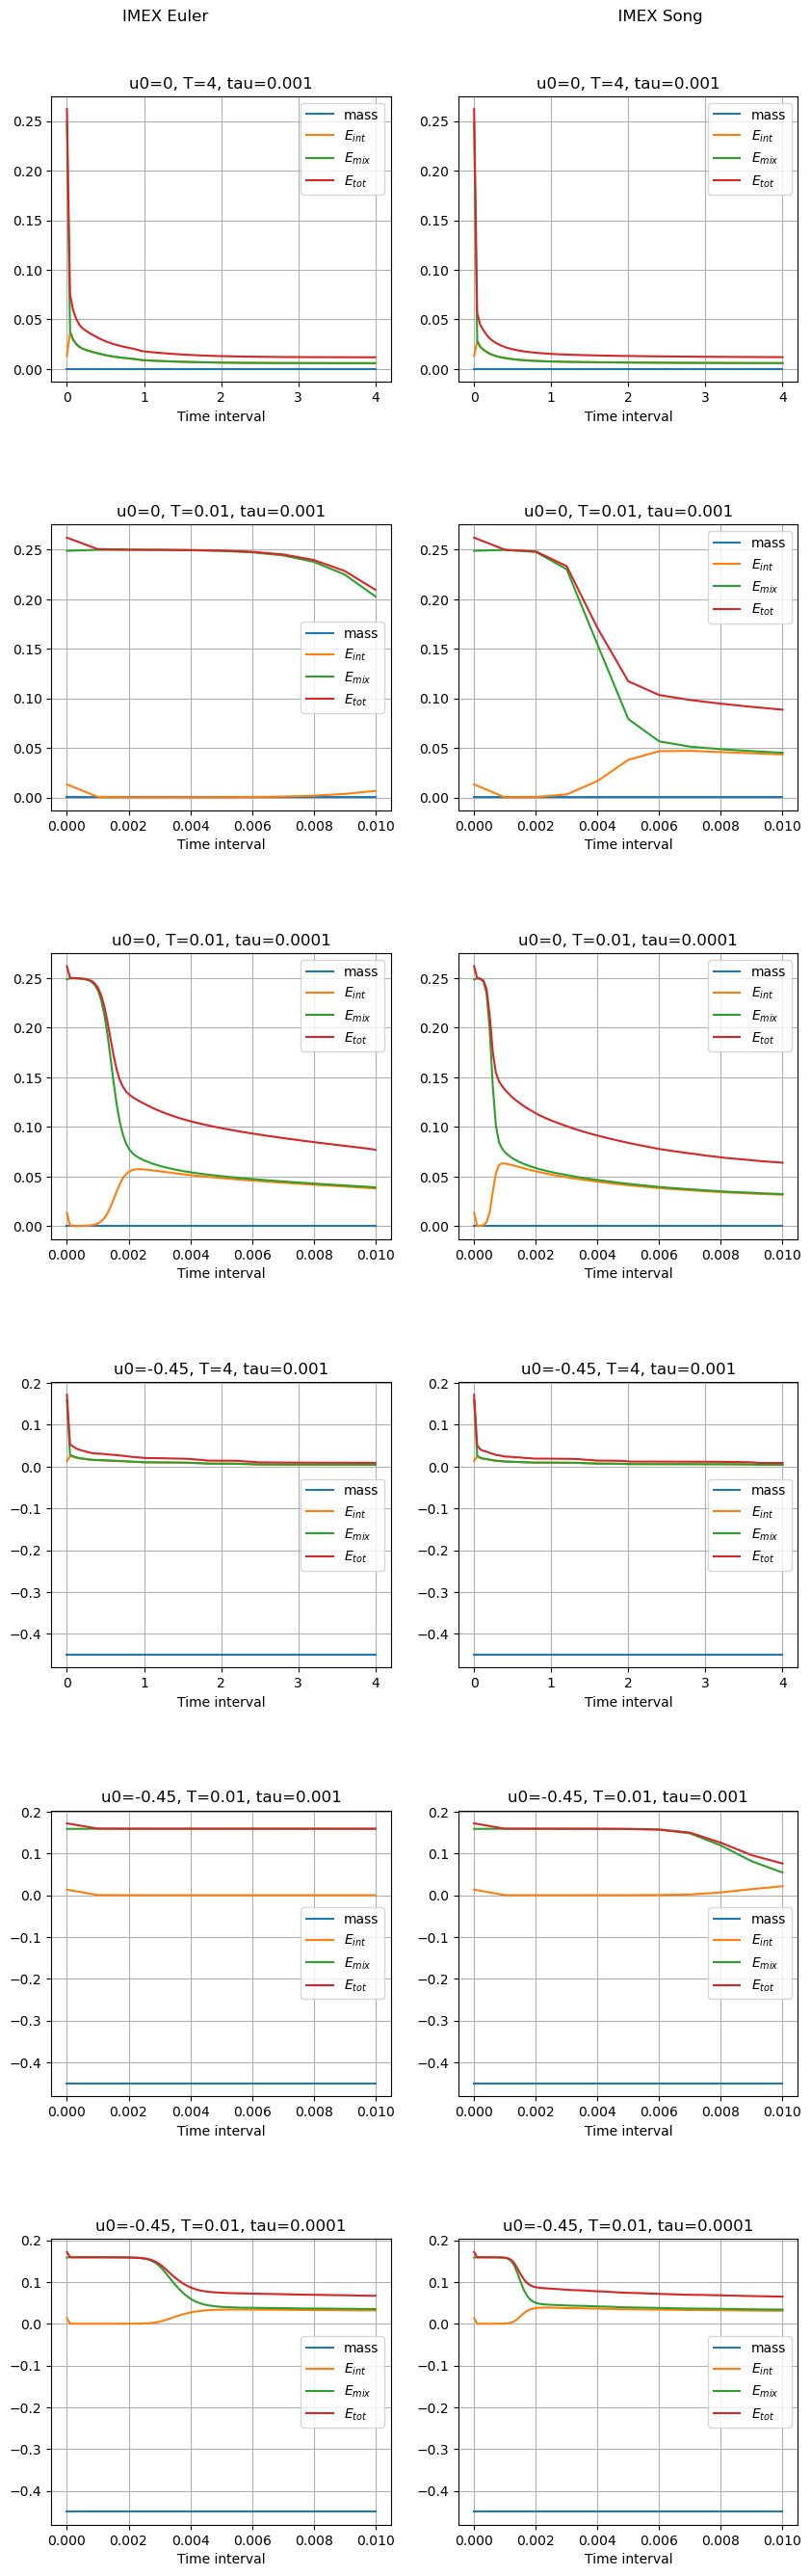

In [ ]:
kappa=0.0025**2 
Lx,Ly=0.5,0.5 
Nx,Ny=256,256
x_6, y_6 = np.linspace(0,Lx,Nx,endpoint=False), np.linspace(0,Ly,Ny,endpoint=False)
X_6, Y_6 = np.meshgrid(x_6,y_6,sparse=True)
t0=0
# Different time intervals
T1=4.0
T2=0.01
Tsd=0.06
# Different time steps
tau1=1e-3
tau2=1e-4
# Different number of time steps
Nt1=int((T1-t0)/tau1)
Nt2=int((T1-t0)/tau2)
Nt3=int((T2-t0)/tau1)
Nt4=int((T2-t0)/tau2)
# Values for alpha and beta for the solver from task 5
alpha_arr=np.array([1.5,-0.5,0,0,1])
beta_arr=np.array([0.5,1])

# Creating different initial values for U (some noise)
rand_num_generator = np.random.default_rng(12345)
noise = 0.05
U0_61 = np.full((Nx, Ny), 0.0) + noise*rand_num_generator.standard_normal((Nx,Ny))
U0_62 = np.full((Nx, Ny), 0.0) + noise*rand_num_generator.standard_normal((Nx,Ny)) - 0.45

#All solutions with solver from task 4...
Uts_61=cahn_hilliard_backward_euler(kappa=kappa, X=X_6, Y=Y_6, U0=U0_61, t0=t0, T=T1, Nt=Nt1,g=None)
Uts_62=cahn_hilliard_backward_euler(kappa=kappa, X=X_6, Y=Y_6, U0=U0_61, t0=t0, T=T1, Nt=Nt2,g=None)
Uts_63=cahn_hilliard_backward_euler(kappa=kappa, X=X_6, Y=Y_6, U0=U0_61, t0=t0, T=T2, Nt=Nt3,g=None)
Uts_64=cahn_hilliard_backward_euler(kappa=kappa, X=X_6, Y=Y_6, U0=U0_61, t0=t0, T=T2, Nt=Nt4,g=None)
Uts_65=cahn_hilliard_backward_euler(kappa=kappa, X=X_6, Y=Y_6, U0=U0_62, t0=t0, T=T1, Nt=Nt1,g=None)
Uts_66=cahn_hilliard_backward_euler(kappa=kappa, X=X_6, Y=Y_6, U0=U0_62, t0=t0, T=T1, Nt=Nt2,g=None)
Uts_67=cahn_hilliard_backward_euler(kappa=kappa, X=X_6, Y=Y_6, U0=U0_62, t0=t0, T=T2, Nt=Nt3,g=None)
Uts_68=cahn_hilliard_backward_euler(kappa=kappa, X=X_6, Y=Y_6, U0=U0_62, t0=t0, T=T2, Nt=Nt4,g=None)
all_Uts_solver4=(Uts_61,Uts_62,Uts_63,Uts_64,Uts_65,Uts_66,Uts_67,Uts_68)



# ... and with solver from task 5
Uts_71=IMEX_song(kappa=kappa,X=X_6,Y=Y_6,U0=U0_61,t0=t0,T=T1,Nt=Nt1,g=None,alpha_arr=alpha_arr,beta_arr=beta_arr)
Uts_72=IMEX_song(kappa=kappa,X=X_6,Y=Y_6,U0=U0_61,t0=t0,T=T1,Nt=Nt2,g=None,alpha_arr=alpha_arr,beta_arr=beta_arr)
Uts_73=IMEX_song(kappa=kappa,X=X_6,Y=Y_6,U0=U0_61,t0=t0,T=T2,Nt=Nt3,g=None,alpha_arr=alpha_arr,beta_arr=beta_arr)
Uts_74=IMEX_song(kappa=kappa,X=X_6,Y=Y_6,U0=U0_61,t0=t0,T=T2,Nt=Nt4,g=None,alpha_arr=alpha_arr,beta_arr=beta_arr)
Uts_75=IMEX_song(kappa=kappa,X=X_6,Y=Y_6,U0=U0_62,t0=t0,T=T1,Nt=Nt1,g=None,alpha_arr=alpha_arr,beta_arr=beta_arr)
Uts_76=IMEX_song(kappa=kappa,X=X_6,Y=Y_6,U0=U0_62,t0=t0,T=T1,Nt=Nt2,g=None,alpha_arr=alpha_arr,beta_arr=beta_arr)
Uts_77=IMEX_song(kappa=kappa,X=X_6,Y=Y_6,U0=U0_62,t0=t0,T=T2,Nt=Nt3,g=None,alpha_arr=alpha_arr,beta_arr=beta_arr)
Uts_78=IMEX_song(kappa=kappa,X=X_6,Y=Y_6,U0=U0_62,t0=t0,T=T2,Nt=Nt4,g=None,alpha_arr=alpha_arr,beta_arr=beta_arr)
all_Uts_solver5=(Uts_71,Uts_72,Uts_73,Uts_74,Uts_75,Uts_76,Uts_77,Uts_78)


# For plotting:
some_Uts = [[Uts_61, Uts_63, Uts_64, Uts_65, Uts_67, Uts_68],
           [Uts_71, Uts_73, Uts_74, Uts_75, Uts_77, Uts_78]]
T_lst = [T1, T2, T2, T1, T2, T2]
titles = ['u0=0, T=4, tau=0.001', 'u0=0, T=0.01, tau=0.001', 'u0=0, T=0.01, tau=0.0001',
          'u0=-0.45, T=4, tau=0.001', 'u0=-0.45, T=0.01, tau=0.001', 'u0=-0.45, T=0.01, tau=0.0001']


# Plotting mass and energies for sover 4:
fig_integrals, ax_integrals = plt.subplots(6,2,figsize=(10,30))
fig_integrals.suptitle('IMEX Euler                                                                                 IMEX Song')
for i in range(2):
    for j in range(6):
        ax_integrals[j][i].set_title(titles[j])
        ax_integrals[j][i].set_xlabel('Time interval')
        ax_integrals[j][i].grid()
        masses, int_eng, mix_eng, tot_eng = calculate_integrals_for_task_6(some_Uts[i][j],kappa,X_6,Y_6,F_approx)
        t = np.linspace(0,T_lst[j],len(masses))
        ax_integrals[j][i].plot(t, masses, label='mass')
        ax_integrals[j][i].plot(t, int_eng, label='$E_{int}$')
        ax_integrals[j][i].plot(t, mix_eng, label='$E_{mix}$')
        ax_integrals[j][i].plot(t, tot_eng, label='$E_{tot}$')
        ax_integrals[j][i].legend()
plt.subplots_adjust(top=0.95, hspace=0.5)

plt.show()

Full discussion of these plots can be found further down. The energy and mass for $T=4$ and $\tau=10^{-4}$ are not plotted because we believe that the results are not worth the runtime of the code. As we see from the plots above, $\tau=10^{-4}$ generally gives smoother graphs, but $\tau=10^{-3}$ is sufficient to clearly observe any changes in mass and energy, which is what we are most interested in anyway.

#### GIF-making

In [ ]:
kappa=0.0025**2 
Lx,Ly=0.5,0.5 
Nx,Ny=256,256
x_6, y_6 = np.linspace(0,Lx,Nx,endpoint=False), np.linspace(0,Ly,Ny,endpoint=False)
X_6, Y_6 = np.meshgrid(x_6,y_6,sparse=True)
t0=0 #Starting time
# Different time intervals
T1=4.0
#Tds for the different simulations
T73=0.01
T63=0.02
T77=0.015
T67=0.033

tau1=1e-3 #Time interval

# Different number of time steps
Nt1=int((T1-t0)/tau1)
Nt73=int((T73-t0)/tau1)
Nt63=int((T63-t0)/tau1)
Nt77=int((T77-t0)/tau1)
Nt67=int((T67-t0)/tau1)

# Values for alpha and beta for the solver from task 5 (Song)
alpha_arr=np.array([1.5,-0.5,0,0,1])
beta_arr=np.array([0.5,1])

# Creating different initial values for U (some noise)
rand_num_generator = np.random.default_rng(12345)
noise = 0.05
U0_61 = np.full((Nx, Ny), 0.0) + noise*rand_num_generator.standard_normal((Nx,Ny))
U0_62 = np.full((Nx, Ny), 0.0) + noise*rand_num_generator.standard_normal((Nx,Ny)) - 0.45

# IMEX Euler
Uts_63=cahn_hilliard_backward_euler(kappa=kappa, X=X_6, Y=Y_6, U0=U0_61, t0=t0, T=T63, Nt=Nt63,g=None)
Uts_67=cahn_hilliard_backward_euler(kappa=kappa, X=X_6, Y=Y_6, U0=U0_62, t0=t0, T=T67, Nt=Nt67,g=None)

#IMEX Song
Uts_73=IMEX_song(kappa=kappa,X=X_6,Y=Y_6,U0=U0_61,t0=t0,T=T73,Nt=Nt73,g=None,alpha_arr=alpha_arr,beta_arr=beta_arr)
Uts_77=IMEX_song(kappa=kappa,X=X_6,Y=Y_6,U0=U0_62,t0=t0,T=T77,Nt=Nt77,g=None,alpha_arr=alpha_arr,beta_arr=beta_arr)


# 1. Snapshots of U_73 (Song) and U_63 (BE) with U0_61 as initial condition

#Song
uts_list1=[]
frameArr=np.array([Nt73-1]) #Specify frames
for u,t in yield_chosen_frames(Uts_73,Nt73, frameArr):
        uts_list1.append((u,t))

ani1 = make_animation(uts_list1,Lx,Ly)

writer = animation.PillowWriter(fps=1,
                               metadata=dict(artist='Me'),
                               bitrate=200)
ani1.save('U_73_snapshot.gif',writer=writer)

#BE
uts_list2=[]
frameArr=np.array([Nt63-1]) #Specify frames
for u,t in yield_chosen_frames(Uts_63,Nt63, frameArr):
        uts_list2.append((u,t))

ani2 = make_animation(uts_list2,Lx,Ly)

writer = animation.PillowWriter(fps=1,
                               metadata=dict(artist='Me'),
                               bitrate=200)
ani2.save('U_63_snapshot.gif',writer=writer)

# 2. Snapshots of U_77 (Song) and U_67 (BE) with U0_62 as initial condition

#Song
uts_list3=[]
frameArr=np.array([Nt77-1]) #Specify frames
for u,t in yield_chosen_frames(Uts_77,Nt77, frameArr):
        uts_list3.append((u,t))

ani3 = make_animation(uts_list3,Lx,Ly)

writer = animation.PillowWriter(fps=1,
                               metadata=dict(artist='Me'),
                               bitrate=200)
ani3.save('U_77_snapshot.gif',writer=writer)

#BE
uts_list4=[]
frameArr=np.array([Nt67-1]) #Specify frames
for u,t in yield_chosen_frames(Uts_67,Nt67, frameArr):
        uts_list4.append((u,t))

ani4 = make_animation(uts_list4,Lx,Ly)

writer = animation.PillowWriter(fps=1,
                               metadata=dict(artist='Me'),
                               bitrate=200)
ani4.save('U_67_snapshot.gif',writer=writer)

# 3. Gif of U0_61 only Song in I=[0,4]
Uts_first=IMEX_song(kappa=kappa,X=X_6,Y=Y_6,U0=U0_61,t0=t0,T=T1,Nt=Nt1,g=None,alpha_arr=alpha_arr,beta_arr=beta_arr)

uts_list5=[]
frameArr=np.array([0,2,4,6,8, 10, 12, 100,500,1000,Nt1-1]) #Specify frames
for u,t in yield_chosen_frames(Uts_first,Nt1, frameArr):
        uts_list5.append((u,t))

ani5 = make_animation(uts_list5,Lx,Ly,interval=40000)

writer = animation.PillowWriter(fps=1,
                               metadata=dict(artist='Me'),
                               bitrate=200)
ani5.save('U_first.gif',writer=writer)

# 4. Gif of U0_62 only Song in I=[0,4]

Uts_second=IMEX_song(kappa=kappa,X=X_6,Y=Y_6,U0=U0_62,t0=t0,T=T1,Nt=Nt1,g=None,alpha_arr=alpha_arr,beta_arr=beta_arr)

uts_list6=[]
frameArr=np.array([0,4,6,8, 10, 12, 100,500,1000,Nt1-1]) #Specify frames
for u,t in yield_chosen_frames(Uts_second,Nt1, frameArr):
        uts_list6.append((u,t))

ani6 = make_animation(uts_list6,Lx,Ly,interval=40000)

writer = animation.PillowWriter(fps=1,
                               metadata=dict(artist='Me'),
                               bitrate=200)
ani6.save('U_second.gif',writer=writer)

<span style='color:gray'> How does the total mass of the concentration field evolve in time?

From the plots, we see that the total mass over the whole domain remains constant over time. This is expected and coincides with mass conservation. The negative mass (in the plots with the second initial condition) represents the case in which $m_1$, the substance we are focusing on in our calculations, is such that $m_1<m_2$, where $m_2$ is the mass of the other substance. Otherwise, $m_2=-m_1$ for the first initial condition, so that the total mass of the two substances is equal to zero.

<br>

<span style='color:gray'>How does the mixing energy, the interface energy and the total energy of the system evolve in time?

We see that the total energy decreases over time in all plots. We expect this fall in total energy since the system will try to minimize its energy. 

There are two antagonistic processes occuring in this system; minimization of interface energy by going towards one homogeneous state, $u=0$, and minimization of mixing energy in which the two substances are completely separated into two separate states, $u\pm 1$. The reason why the interface energy increases slightly in all plots is that since the interface energy is small compared to the mixing energy (due to a small value of $\kappa$), the system will in most cases 'choose' to minimize the mixing energy, since the value of the total energy will be close to this energy. In other words, when $\mathcal{E}_{int} \rightarrow 0$, then $\mathcal{E}_{tot} \approx \mathcal{E}_{mix}$, so reducing the mixing energy has the greatest effect of the total energy, even if it comes at the cost of increasing the interface energy a little bit.

Another interesting remark is that the interface energy drops to zero before it increases, while the mixing energy remains more or less constant. Why this happens is hard to tell. It might be that the system finds it easier to reduce the interface energy, but when the interface energy is eventually zero, the system needs to reduce the mixing energy for the total energy to decrease further. In order for the mixing energy to decrease, the interface energy must increase somewhat again.

<br>

<span style='color:gray'>Can you spot any differences in the evolution of the energies for the two different initial conditions? If so, can you relate those to the evolution of the snapshots?

Of course, the energies start at a lower value for $t=0$ for the second initial condition than for the first, since the mass density is lower from the beginning (we have substracted $0.45$). Since there is a smaller initial amount of mass for the second initial condition, this gives a shape of droplets, rather than equal shapes for the two substances as for the first initial condition when the starting amount is the same (see snapshots below).

What is probably even more interesting is that the Ostwald ripening starts at different times for the different initial conditions. For the first condition, the Ostwald ripening starts somewhat earlier. We can see that because the steep slope on the total energy graph shows up earlier in the first plots. In the snapshots below, this is the time when the pattern changes very quickly, and the phases are rapidly separated. In essence, a quick phase separation (spinodal decomposition) corresponds to a large gradient in the energy plot, while a slow phase separation (Ostwald ripening) corresponds to a small gradient.

![U_first](U_first.gif)
![U_second](U_second.gif)

The snapshots attached are from the solver from task 5 (Song IMEX), with the two different initial conditions as well as with $T=4.0$, and $\tau = 1\times 10^{-3}$.

<span style='color:gray'> How does the time step size influence the evolution of the energies and the snapshots?

Looking at the energy plots, the Ostwald ripening seems to occur about ten times earlier when the time step size is divided by 10. This can also be seen from the animations. This means that the simulations do not depend on the time that has passed, only on the number of timesteps taken. As is generally observed, our solvers converges faster for smaller time steps.

<span style='color:gray'>How does solver choice influence the evolution of the energies and the snapshots?

The choice of solver also affects the timescale for the spinodal decompotition. This we can see from the pictures below:

Initial condition 1 (top: IMEX Euler, bottom: IMEX Song)

![U_63](U_63_snapshot.gif)
![U_73](U_73_snapshot.gif)

and 

Initial condition 2 (top: IMEX Euler, bottom: IMEX Song)

![U_67](U_67_snapshot.gif)
![U_77](U_77_snapshot.gif)

These pictures show the transition between the spinodal decomposition and the Ostwald ripening. Looking at two similar pictures, the upper one is from solver from task 4 (IMEX Euler), while the lower one is from the solver from task 5 (IMEX Song). As we can see, the shape looks the same for both solvers. Looking closer, we see that more time has passed in the pictures where IMEX Euler was used. This is due to the different convergence orders of the different solvers. Since the convergence order of IMEX Song is higher, this solver uses less time (and fewer timesteps) to reach to the same stage as IMEX Euler. In fect, Song uses about half the time to reach the same stage as Euler, which is consistent with their convergence orders of $2$ and $1$, respectively.

<span style='color:gray'> Identify roughly when the spinodal decomposition and the Ostwald ripening occur in the simulations? At which time does the evolution slow down siginificantly? And when does the system reach an equilibrium state?

The spinodal decompositnion ends at different times for each simulation. For example, for the four pictures above which show the transition between the spinodal decomposition and the Oswald ripening, the time at which the transition is happening is about $0.020$, $0.010$, $0.030$ and $0.015$ (in the same order as the pictures are shown). As mentioned before, it takes about ten times as much time for the timesteps at $1\times 10^{-3}$ time units, than for the timesteps at $1\times 10^{-4}$ time units.

The equilibrium state is also reached at different times for the different initial conditions, timesteps and solvers. With IMEX Song, it takes about half as long as it does for IMEX Euler to reach equilibrium state. For the $T=4$ and $\tau=0.001$, it takes about $4$ time units to reach equilibrium state for IMEX Song. In concurrence with the order of convergence, it should take about twice the time for IMEX Euler, and a tenth of the time for ten times as short timesteps. All the plots and animations seem to behave accordingly.